## **Importing Libraries**

In [ ]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning and Data Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from scipy import stats

# Synthetic Data Generation
from imblearn.over_sampling import SMOTE

import missingno as msno

## **Exploring Dataset**

In [ ]:
# Load the Dataset
Dataset = pd.read_csv('Synthetic Fraud Detection Dataset.csv')

## **Glimpse the data**

In [ ]:
print(f"Data shape: {Dataset.shape}")

Data shape: (10127, 17)


In [ ]:
print(type(Dataset)) # To determine type of the DataSet object.

<class 'pandas.core.frame.DataFrame'>


In [ ]:
Dataset.head() # By default it displays the first 5 rows.

,Unnamed: 0,step,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,isFraud
0,0,1,PAYMENT,Indonesia,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,9,0,Current,3/1/2018,Morning,0.0
1,1,1,PAYMENT,India,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,10,0,Savings,5/1/2018,Morning,0.0
2,2,1,TRANSFER,India,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,2,0,Current,7/1/2018,Morning,1.0
3,3,1,CASH_OUT,Australia,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,Current,6/1/2018,Afternoon,1.0
4,4,1,PAYMENT,Australia,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,17,0,Current,6/1/2018,Morning,0.0


## **Data Exploration**

Let's start by checking for:

columns names and types, and memory usage (info);
aggregated functions for numerical values (describe);
missing values;
unique values.

In [ ]:
'''This syntax gives a concise summary of a DataFrame, which includes information about the DataFrame's index, data types,
   and non-null values for each column.
   This method is particularly helpful for understanding the structure and
   cleanliness of the dataset at a glance.
'''
print(Dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           10127 non-null  int64  
 1   step                 10127 non-null  int64  
 2   type                 10123 non-null  object 
 3   branch               10127 non-null  object 
 4   amount               10125 non-null  float64
 5   nameOrig             10121 non-null  object 
 6   oldbalanceOrg        10125 non-null  float64
 7   newbalanceOrig       10127 non-null  float64
 8   nameDest             10121 non-null  object 
 9   oldbalanceDest       10126 non-null  float64
 10  newbalanceDest       10125 non-null  float64
 11  unusuallogin         10127 non-null  int64  
 12  isFlaggedFraud       10127 non-null  int64  
 13  Acct type            10117 non-null  object 
 14  Date of transaction  10120 non-null  object 
 15  Time of day          10125 non-null 

In [ ]:
Dataset.columns # Displays the column names of the DataFrame

Index(['Unnamed: 0', 'step', 'type', 'branch', 'amount', 'nameOrig',
       'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest',
       'newbalanceDest', 'unusuallogin', 'isFlaggedFraud', 'Acct type',
       'Date of transaction', 'Time of day', 'isFraud'],
      dtype='object')

In [ ]:
# Drop the 'unnamed' column
Dataset.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
''' This method generates a summary of key statistical measures for numerical columns, and with the include parameter,
    it can also provide statistics for categorical columns. This summary includes metrics like count, mean, standard deviation,
    minimum, maximum, and the values at various percentiles. This metric are called 'Key Statistics'
'''
print(Dataset.describe()) # Descriptive Statistics before handling the missing values

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  10127.000000  1.012500e+04   1.012500e+04    1.012700e+04   
mean       4.214279  1.048869e+05   8.836965e+05    9.044703e+05   
std        2.484139  2.706369e+05   2.124554e+06    2.169946e+06   
min        1.000000  2.390000e+00   0.000000e+00    0.000000e+00   
25%        1.000000  4.397380e+03   1.290000e+02    0.000000e+00   
50%        5.000000  1.279831e+04   2.136300e+04    1.021224e+04   
75%        7.000000  1.143818e+05   1.724320e+05    1.707240e+05   
max        7.000000  1.000000e+07   1.290000e+07    1.300000e+07   

       oldbalanceDest  newbalanceDest  unusuallogin  isFlaggedFraud  \
count    1.012600e+04    1.012500e+04  10127.000000         10127.0   
mean     9.335393e+05    1.109315e+06     10.513183             0.0   
std      2.677976e+06    3.048644e+06      5.809233             0.0   
min      0.000000e+00    0.000000e+00      0.000000             0.0   
25%      0.000000e+00    0.00000

In [ ]:
# This syntax is used to count missing values in a DataFrame.

''' .isnull(): This method creates a DataFrame of the same shape as the original, but with boolean values (True or False)
    indicating missing values. True indicates a missing value, and False indicates a valid value.
'''

''' .sum(): This method applied after '.isnull()' calculates the sum of the True values in each column,
    essentially counting the number of missing values in each column.
'''
missing_values = Dataset.isnull().sum()
print(missing_values)

step                    0
type                    4
branch                  0
amount                  2
nameOrig                6
oldbalanceOrg           2
newbalanceOrig          0
nameDest                6
oldbalanceDest          1
newbalanceDest          2
unusuallogin            0
isFlaggedFraud          0
Acct type              10
Date of transaction     7
Time of day             2
isFraud                 2
dtype: int64


In [ ]:
# The function computes the total number of missing values, the percentage of missing values, and the data type of each column.

def missing_data(Dataset):
    total = Dataset.isnull().sum() # Compute the total number of missing values in each column
    percent = (Dataset.isnull().sum()/Dataset.isnull().count()*100) # Compute the percentage of missing values in each column
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # Combine the total and percentage of missing values into a single DataFrame

    # Determine the data type of each column and add it to the DataFrame
    types = []
    for col in Dataset.columns:
        dtype = str(Dataset[col].dtype)
        types.append(dtype)
    tt['Types'] = types

    # Transpose the DataFrame and return it
    return(np.transpose(tt))
print(missing_data(Dataset))

          step      type  branch    amount  nameOrig oldbalanceOrg  \
Total        0         4       0         2         6             2   
Percent    0.0  0.039498     0.0  0.019749  0.059248      0.019749   
Types    int64    object  object   float64    object       float64   

        newbalanceOrig  nameDest oldbalanceDest newbalanceDest unusuallogin  \
Total                0         6              1              2            0   
Percent            0.0  0.059248       0.009875       0.019749          0.0   
Types          float64    object        float64        float64        int64   

        isFlaggedFraud Acct type Date of transaction Time of day   isFraud  
Total                0        10                   7           2         2  
Percent            0.0  0.098746            0.069122    0.019749  0.019749  
Types            int64    object              object      object   float64  


## Plotting missing values as a bar plot

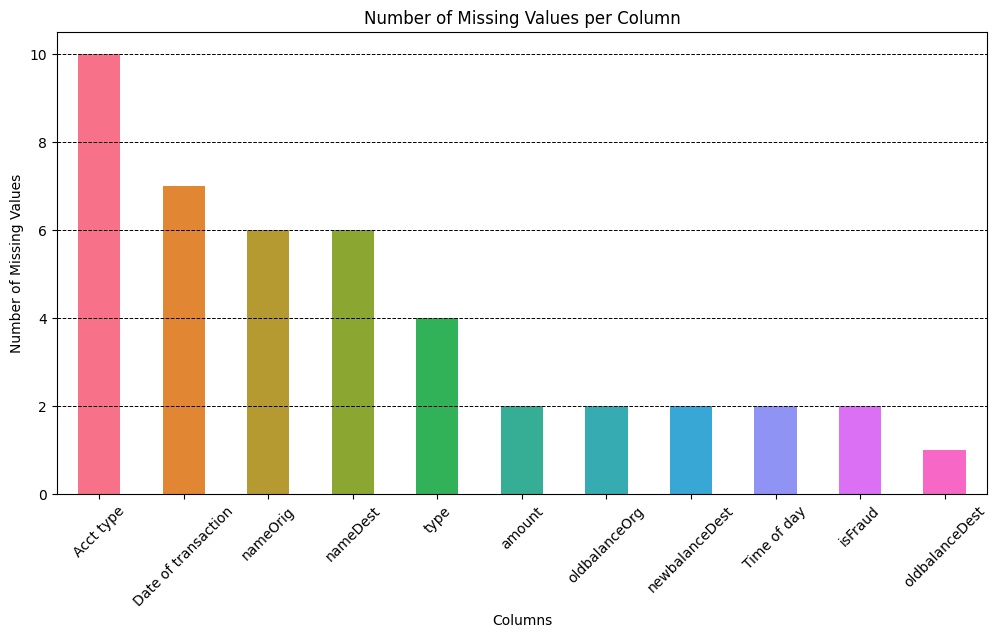

In [ ]:
missing_values = missing_values[missing_values > 0]

# Generate a color palette
colors = sns.color_palette('husl', len(missing_values))

# Plotting missing values as a bar plot
plt.figure(figsize=(12, 6))
#missing_values.plot(kind='bar', color=colors)
missing_values.sort_values(ascending=False).plot(kind='bar', color= colors)
plt.title('Number of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7, color='black')  # Add grid lines
plt.show()

## Handling missing values

In [ ]:
# Fill missing values in 'type' column with 'unknown' as type column is in string
Dataset['type'].fillna('unknown', inplace=True)

# Fill missing values in 'amount' column with the median value of the 'amount' column
Dataset['amount'].fillna(Dataset['amount'].median(), inplace=True)

# Fill missing values in 'nameOrig' column with 'unknown'
Dataset['nameOrig'].fillna('unknown', inplace=True)

# Fill missing values in 'oldbalanceOrg' column with the median value of the 'oldbalanceOrg' column
Dataset['oldbalanceOrg'].fillna(Dataset['oldbalanceOrg'].median(), inplace=True)

# Fill missing values in 'newbalanceOrig' column with the median value of the 'newbalanceOrig' column
Dataset['newbalanceOrig'].fillna(Dataset['newbalanceOrig'].median(), inplace=True)

# Fill missing values in 'nameDest' column with 'unknown'
Dataset['nameDest'].fillna('unknown', inplace=True)

# Fill missing values in 'oldbalanceDest' column with the median value of the 'oldbalanceDest' column
Dataset['oldbalanceDest'].fillna(Dataset['oldbalanceDest'].median(), inplace=True)

# Fill missing values in 'newbalanceDest' column with the median value of the 'newbalanceDest' column
Dataset['newbalanceDest'].fillna(Dataset['newbalanceDest'].median(), inplace=True)

# Fill missing values in 'Acct type' column with 'unknown'
Dataset['Acct type'].fillna('unknown', inplace=True)

# Forward fill method fills the missing values with the last observed non-null value
# Fill missing values in 'Date of transaction' column using forward fill method
Dataset['Date of transaction'].fillna(method='ffill', inplace=True)

# Fill missing values in 'Time of day' column using forward fill method
Dataset['Time of day'].fillna(method='ffill', inplace=True)


In [ ]:
# Drop rows with missing values in 'isFraud' column
Dataset.dropna(subset=['isFraud'], inplace=True)

In [ ]:
# Convert 'isFraud' to integer
Dataset['isFraud'] = Dataset['isFraud'].astype(int)

In [ ]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10125 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   step                 10125 non-null  int64  
 1   type                 10125 non-null  object 
 2   branch               10125 non-null  object 
 3   amount               10125 non-null  float64
 4   nameOrig             10125 non-null  object 
 5   oldbalanceOrg        10125 non-null  float64
 6   newbalanceOrig       10125 non-null  float64
 7   nameDest             10125 non-null  object 
 8   oldbalanceDest       10125 non-null  float64
 9   newbalanceDest       10125 non-null  float64
 10  unusuallogin         10125 non-null  int64  
 11  isFlaggedFraud       10125 non-null  int64  
 12  Acct type            10125 non-null  object 
 13  Date of transaction  10125 non-null  object 
 14  Time of day          10125 non-null  object 
 15  isFraud              10125 non-null  int6

In [ ]:
Dataset.isnull().sum() # Sum of missing values of each column after handling missing values

step                   0
type                   0
branch                 0
amount                 0
nameOrig               0
oldbalanceOrg          0
newbalanceOrig         0
nameDest               0
oldbalanceDest         0
newbalanceDest         0
unusuallogin           0
isFlaggedFraud         0
Acct type              0
Date of transaction    0
Time of day            0
isFraud                0
dtype: int64

In [ ]:
#  The function computes the total number of unique values for each column in the DataFrame.

def unique_values(df):
    total = Dataset.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in Dataset.columns:
        unique = Dataset[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

unique_values(Dataset)

,step,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,isFraud
Total,10125,10125,10125,10125,10125,10125,10125,10125,10125,10125,10125,10125,10125,10125,10125,10125
Uniques,7,6,135,10077,10120,7327,5935,6495,4160,1509,21,1,3,14,3,2


## Unique Elements

In [ ]:
# To find Unique Elements in 'step' column
unique_step = Dataset['step'].unique()
print("Unique Elements in 'step' column :-", unique_step)

# To find Unique Elements in 'type' column
unique_type = Dataset['type'].unique()
print("\nUnique Elements in 'type' column:-",unique_type)

# To find Unique Elements in 'branch' column
unique_branch = Dataset['branch'].unique()
print("\nUnique Elements in 'branch' column:-\n",unique_branch)

#To find Unique Elements in 'isFraud' column
unique_isFraud = Dataset['isFraud'].unique()
print("\nUnique Elements in 'type' column:- ", unique_isFraud)

#To find Unique Elements in an 'unusuallogin' column
unique_unusuallogin = Dataset['unusuallogin'].unique()
print("\nUnique Elements in an 'unusuallogin' column:-\n",unique_unusuallogin)

#To find Unique Elements in 'Date of transaction' column
unique_Date_of_transaction = Dataset['Date of transaction'].unique()
print("\nUnique Elements in 'Date of transaction' column:-\n", unique_Date_of_transaction)

#To find Unique Elements in an 'Acct type' column
unique_Acct_type = Dataset['Acct type'].unique()
print("\nUnique Elements in an 'Acct type' column:-", unique_Acct_type)

#To find Unique Elements in 'Time of day' column
unique_Time_of_day = Dataset['Time of day'].unique()
print("\nUnique Elements in 'Time of day' column:-", unique_Time_of_day)

Unique Elements in 'step' column :- [1 2 3 4 5 6 7]

Unique Elements in 'type' column:- ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'unknown' 'CASH_IN']

Unique Elements in 'branch' column:-
 ['Indonesia' 'India' 'Australia' 'China' 'Japon' 'Corea del Sur'
 'Singapur' 'Turquia' 'Mongolia' 'Estados Unidos' 'Nigeria'
 'Republica Democratica del Congo' 'Senegal' 'Marruecos' 'Alemania'
 'Francia' 'Paises Bajos' 'Reino Unido' 'Guatemala' 'El Salvador' 'Panama'
 'Republica Dominicana' 'Venezuela' 'Colombia' 'Honduras' 'Brasil'
 'Mexico' 'Uruguay' 'Argentina' 'Cuba' 'Peru' 'Nicaragua' 'Ecuador'
 'Angola' 'Sudan' 'Somalia' 'Costa de Marfil' 'Egipto' 'Italia' 'Espana'
 'Suecia' 'Austria' 'Canada' 'Madagascar' 'Argelia' 'Liberia' 'Zambia'
 'Niger' 'SudAfrica' 'Mozambique' 'Tanzania' 'Ruanda' 'Israel'
 'Nueva Zelanda' 'Banglades' 'Tailandia' 'Irak' 'Arabia Saudi' 'Filipinas'
 'Kazajistan' 'Iran' 'Myanmar (Birmania)' 'Uzbekistan' 'Benin' 'Camerun'
 'Kenia' 'Togo' 'Ucrania' 'Polonia' 'Portugal' 'Ruman

## Visualizing the Distribution of Transaction Types


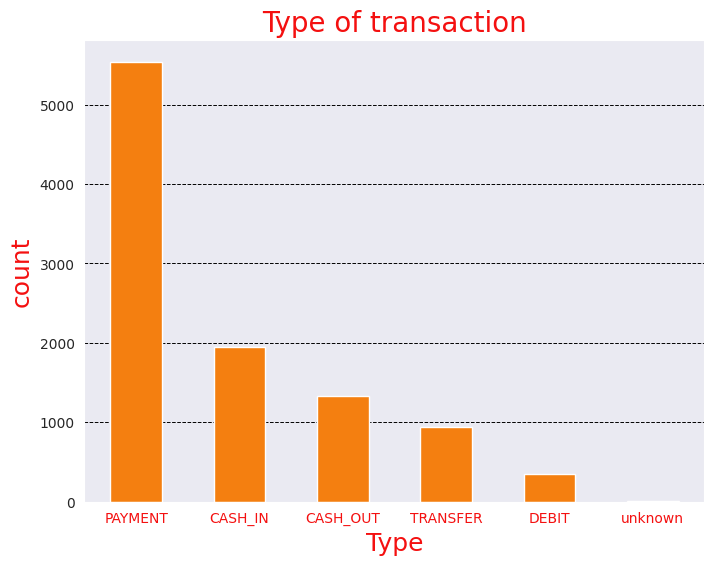

In [ ]:
sns.set_style("dark") # set the style of the plot as dark grid
sns.set_palette("pastel")
plt.figure(figsize = (8,6))
Dataset['type'].value_counts().plot(kind = 'bar', color = '#F47F10')
plt.title('Type of transaction', color = '#F41010', fontsize = 20)
plt.xticks(rotation = 0, color = '#F41010')
plt.xlabel('Type', fontsize = 18, color = '#F41010')
plt.ylabel('count', fontsize = 18, color = '#F41010')
plt.grid(axis='y', linestyle='--', linewidth=0.7, color='black')  # Add grid lines
plt.show()


# Counts how many transactions exist for each transaction type.

In [ ]:
Dataset.groupby('type').count()['amount']

type
CASH_IN     1953
CASH_OUT    1336
DEBIT        346
PAYMENT     5540
TRANSFER     946
unknown        4
Name: amount, dtype: int64

## Count of each type of Transaction in Percentage

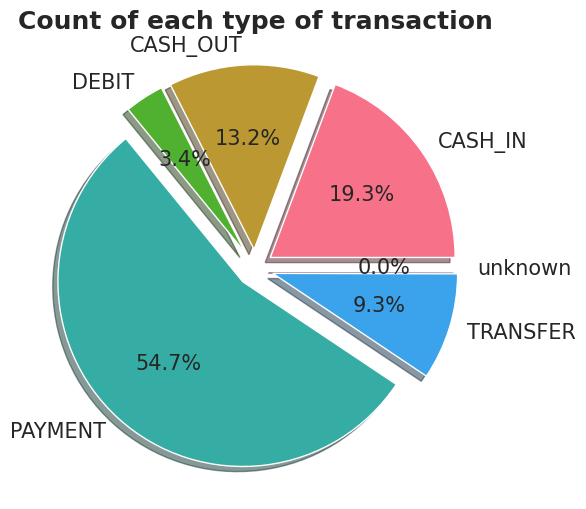

In [ ]:
# Grouping by transaction type and counting the occurrences
counts = Dataset.groupby('type').count()['amount']

# Generate colors from seaborn color palette``
colors = sns.color_palette('husl', len(counts))

# Define explode parameters
explode = [0.1] * len(counts)  # Explode each wedge by 0.1

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct="%1.1f%%", colors=colors, shadow=True, explode=explode, textprops={'fontsize': 15})
plt.title('Count of each type of transaction', fontweight='bold', fontsize=18)
plt.show()


In [ ]:
Dataset.groupby(['type','isFraud']).count()

step  branch  amount  nameOrig  oldbalanceOrg  \
type     isFraud                                                  
CASH_IN  0        1953    1953    1953      1953           1953   
CASH_OUT 0        1301    1301    1301      1301           1301   
         1          35      35      35        35             35   
DEBIT    0         346     346     346       346            346   
PAYMENT  0        5540    5540    5540      5540           5540   
TRANSFER 0         913     913     913       913            913   
         1          33      33      33        33             33   
unknown  0           4       4       4         4              4   

                  newbalanceOrig  nameDest  oldbalanceDest  newbalanceDest  \
type     isFraud                                                             
CASH_IN  0                  1953      1953            1953            1953   
CASH_OUT 0                  1301      1301            1301            1301   
         1                    35        35              35              35   
DEBIT    0                   346       346             346             346   
PAYMENT  0                  5540      5540            5540            5540   
TRANSFER 0                   913       913             913             913   
         1                    33        33              33              33   
unknown  0                     4         4               4               4   

                  unusuallogin  isFlaggedFraud  Acct type  \
type     isFraud                                            
CASH_IN  0                1953            1953       1953   
CASH_OUT 0                1301            1301       1301   
         1                  35              35         35   
DEBIT    0                 346             346        346   
PAYMENT  0                5540            5540       5540   
TRANSFER 0                 913             913        913   
         1                  33              33         33   
unknown  0                   4               4          4   

                  Date of transaction  Time of day  
type     isFraud                                    
CASH_IN  0                       1953         1953  
CASH_OUT 0                       1301         1301  
         1                         35           35  
DEBIT    0                        346          346  
PAYMENT  0                       5540         5540  
TRANSFER 0                        913          913  
         1                         33           33  
unknown  0                          4            4

## Descriptive Statistics after handling missing values

In [ ]:
''' This method generates a summary of key statistical measures for numerical columns, and with the include parameter,
    it can also provide statistics for categorical columns. This summary includes metrics like count, mean, standard deviation,
    minimum, maximum, and the values at various percentiles. This metric are called 'Key Statistics'
'''
print(Dataset.describe()) # Descriptive Statistics after handling missing values

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  10125.000000  1.012500e+04   1.012500e+04    1.012500e+04   
mean       4.214914  1.048847e+05   8.836970e+05    9.046314e+05   
std        2.483974  2.706374e+05   2.124554e+06    2.170130e+06   
min        1.000000  2.390000e+00   0.000000e+00    0.000000e+00   
25%        1.000000  4.397580e+03   1.290000e+02    0.000000e+00   
50%        5.000000  1.279831e+04   2.136300e+04    1.019179e+04   
75%        7.000000  1.143818e+05   1.724320e+05    1.707442e+05   
max        7.000000  1.000000e+07   1.290000e+07    1.300000e+07   

       oldbalanceDest  newbalanceDest  unusuallogin  isFlaggedFraud  \
count    1.012500e+04    1.012500e+04  10125.000000         10125.0   
mean     9.336264e+05    1.109315e+06     10.513580             0.0   
std      2.678094e+06    3.048644e+06      5.809393             0.0   
min      0.000000e+00    0.000000e+00      0.000000             0.0   
25%      0.000000e+00    0.00000

## We continue with the distribution of the data (count plots for categorical values, values distribution for numerical values).

## Counting the distribution of transaction types

In [ ]:
# Counting the distribution of transaction types
transaction_type_distribution = Dataset['type'].value_counts()

# Displaying the distribution of transaction types
print("Distribution of Transaction Types:")
print(transaction_type_distribution)

Distribution of Transaction Types:
type
PAYMENT     5540
CASH_IN     1953
CASH_OUT    1336
TRANSFER     946
DEBIT        346
unknown        4
Name: count, dtype: int64


## Counting the distribution of Fraud and Non-Fraud Transactions



In [ ]:
# Counting the distribution of fraud and non-fraud transactions
fraud_distribution = Dataset['isFraud'].value_counts()

# Displaying the distribution of fraud and non-fraud transactions
print("Distribution of Fraud and Non-Fraud Transactions:")
print(fraud_distribution)

Distribution of Fraud and Non-Fraud Transactions:
isFraud
0    10057
1       68
Name: count, dtype: int64


In [ ]:
# Drop the 'isFlaggedFraud' column
Updated_df = Dataset.drop(columns=['isFlaggedFraud'], inplace=False)

In [ ]:
Updated_df.info() #After removing 'isFlaggedFraud' column

<class 'pandas.core.frame.DataFrame'>
Index: 10125 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   step                 10125 non-null  int64  
 1   type                 10125 non-null  object 
 2   branch               10125 non-null  object 
 3   amount               10125 non-null  float64
 4   nameOrig             10125 non-null  object 
 5   oldbalanceOrg        10125 non-null  float64
 6   newbalanceOrig       10125 non-null  float64
 7   nameDest             10125 non-null  object 
 8   oldbalanceDest       10125 non-null  float64
 9   newbalanceDest       10125 non-null  float64
 10  unusuallogin         10125 non-null  int64  
 11  Acct type            10125 non-null  object 
 12  Date of transaction  10125 non-null  object 
 13  Time of day          10125 non-null  object 
 14  isFraud              10125 non-null  int64  
dtypes: float64(5), int64(3), object(7)
memory

## Finding the correlation between the attributes

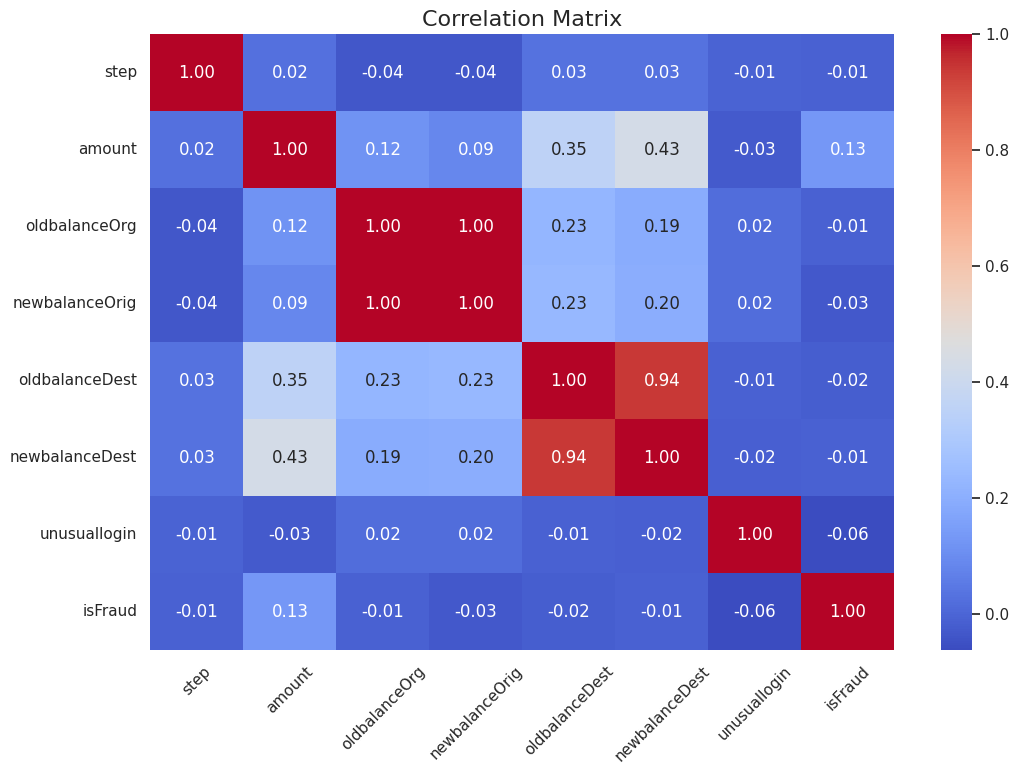

In [ ]:
# Selecting only numeric columns
numeric_columns = Updated_df.select_dtypes(include=['float64', 'int64'])

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = numeric_columns.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix', fontsize = 16)
plt.xticks(rotation = 45)
plt.show()

## Enhancing Fraud Detection Analysis: Capping Outliers in Transaction Amounts by 'type' column

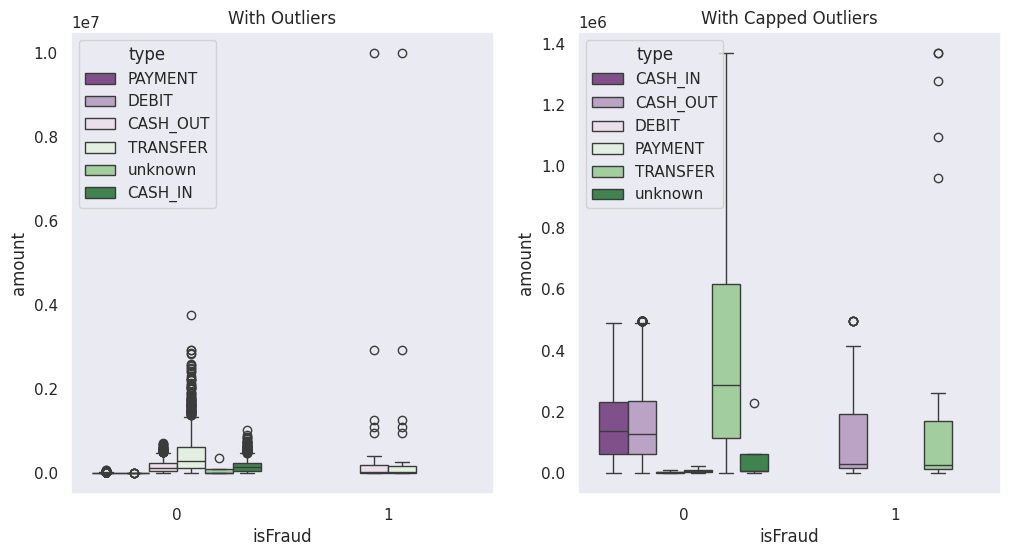

In [ ]:
# Function to cap outliers based on IQR for each group
def cap_outliers_grouped(df, group_col, target_col):
    def cap_outliers(df_group):
        Q1 = df_group[target_col].quantile(0.25)
        Q3 = df_group[target_col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_group[target_col] = np.where(
            df_group[target_col] > upper_bound, upper_bound,
            np.where(
                df_group[target_col] < lower_bound, lower_bound,
                df_group[target_col]
            )
        )
        return df_group

    # Apply the capping function to each group
    return df.groupby(group_col).apply(cap_outliers).reset_index(drop=True)

# Updated_df is the DataFrame and 'amount' is the column to cap outliers
Dataset_capped = cap_outliers_grouped(Updated_df.copy(), 'type', 'amount')

# Plotting
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Original data with outliers shown
sns.boxplot(ax=ax1, x="isFraud", y="amount", hue="type", data=Updated_df, palette="PRGn")
ax1.set_title('With Outliers')

# Data with outliers capped
sns.boxplot(ax=ax2, x="isFraud", y="amount", hue="type", data=Dataset_capped, palette="PRGn")
ax2.set_title('With Capped Outliers')

plt.show()

# Box Plots of Old Balance Original by Transaction Type and Fraud Status

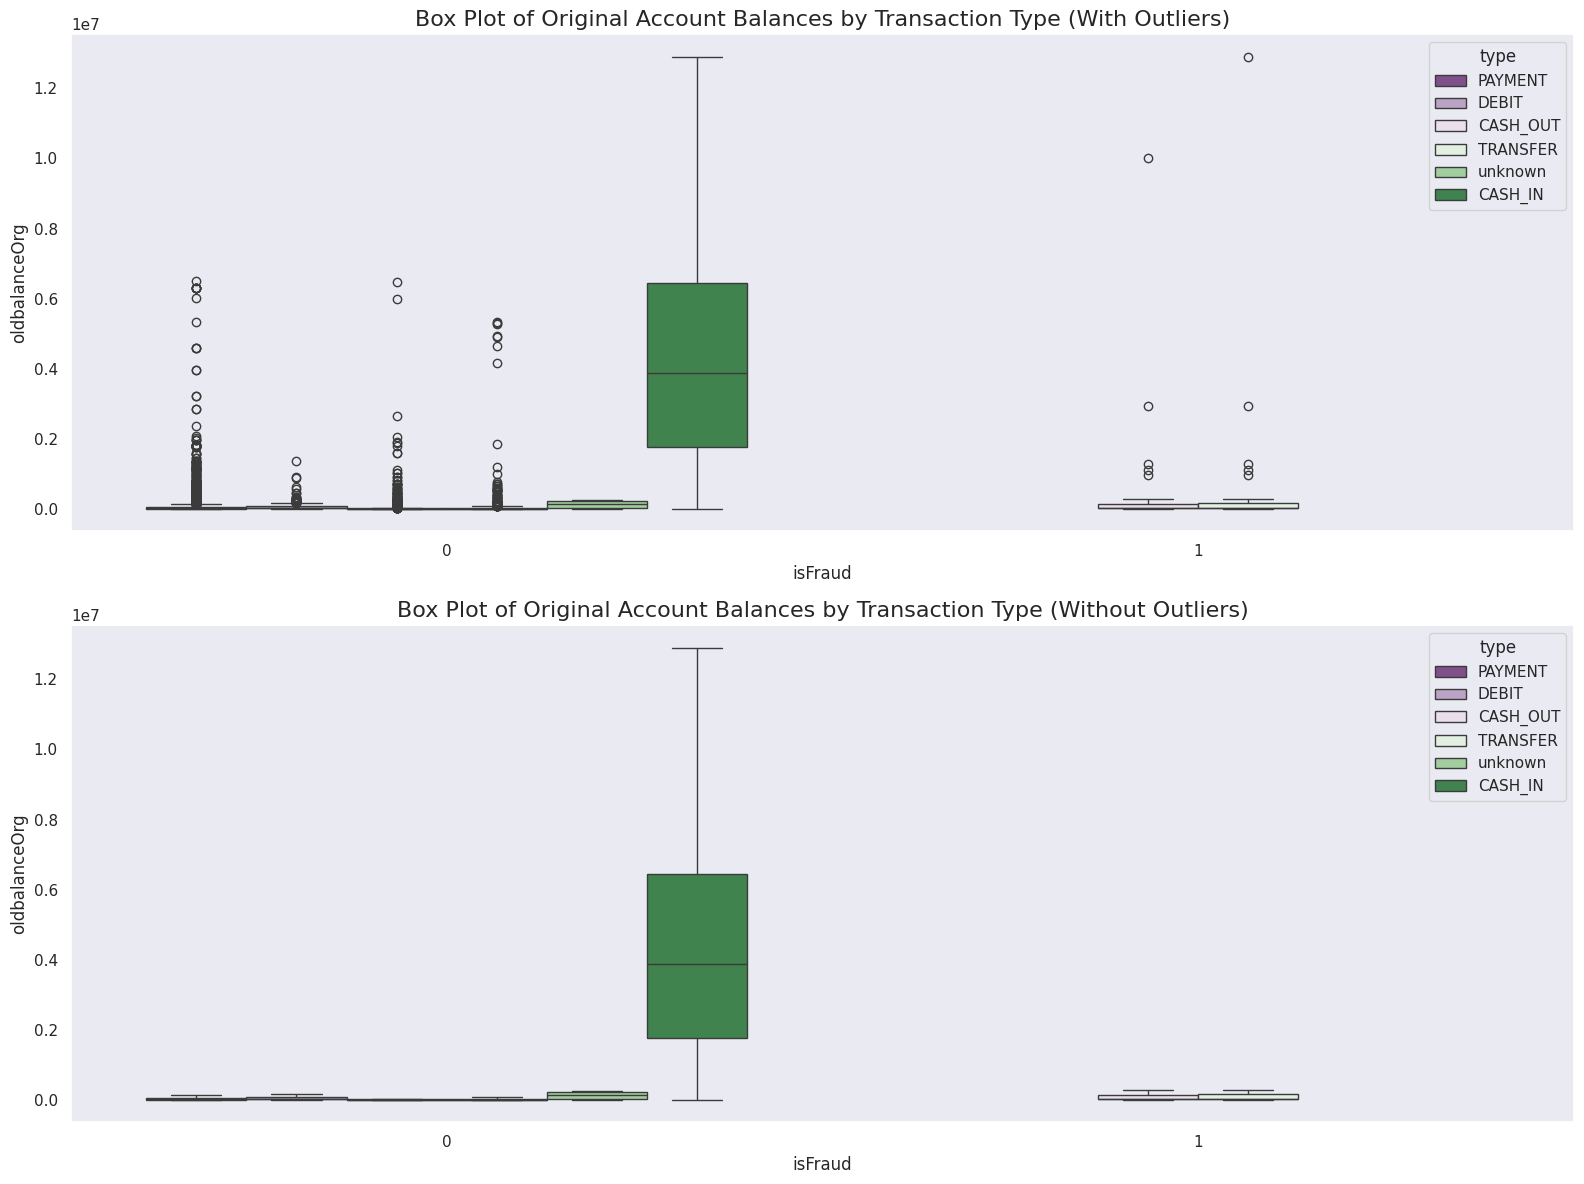

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16,12))

# Box plot with outliers
sns.boxplot(ax=ax1, x="isFraud", y="oldbalanceOrg", hue="type", data=Updated_df, palette="PRGn", showfliers=True)
ax1.set_title('Box Plot of Original Account Balances by Transaction Type (With Outliers)', fontsize=16)

# Box plot without outliers
sns.boxplot(ax=ax2, x="isFraud", y="oldbalanceOrg", hue="type", data=Updated_df, palette="PRGn", showfliers=False)
ax2.set_title('Box Plot of Original Account Balances by Transaction Type (Without Outliers)', fontsize=16)

plt.tight_layout()
plt.show()


## Capping Outliers in 'oldbalanceOrg' by Transaction Type, Excluding 'CASH_IN' group

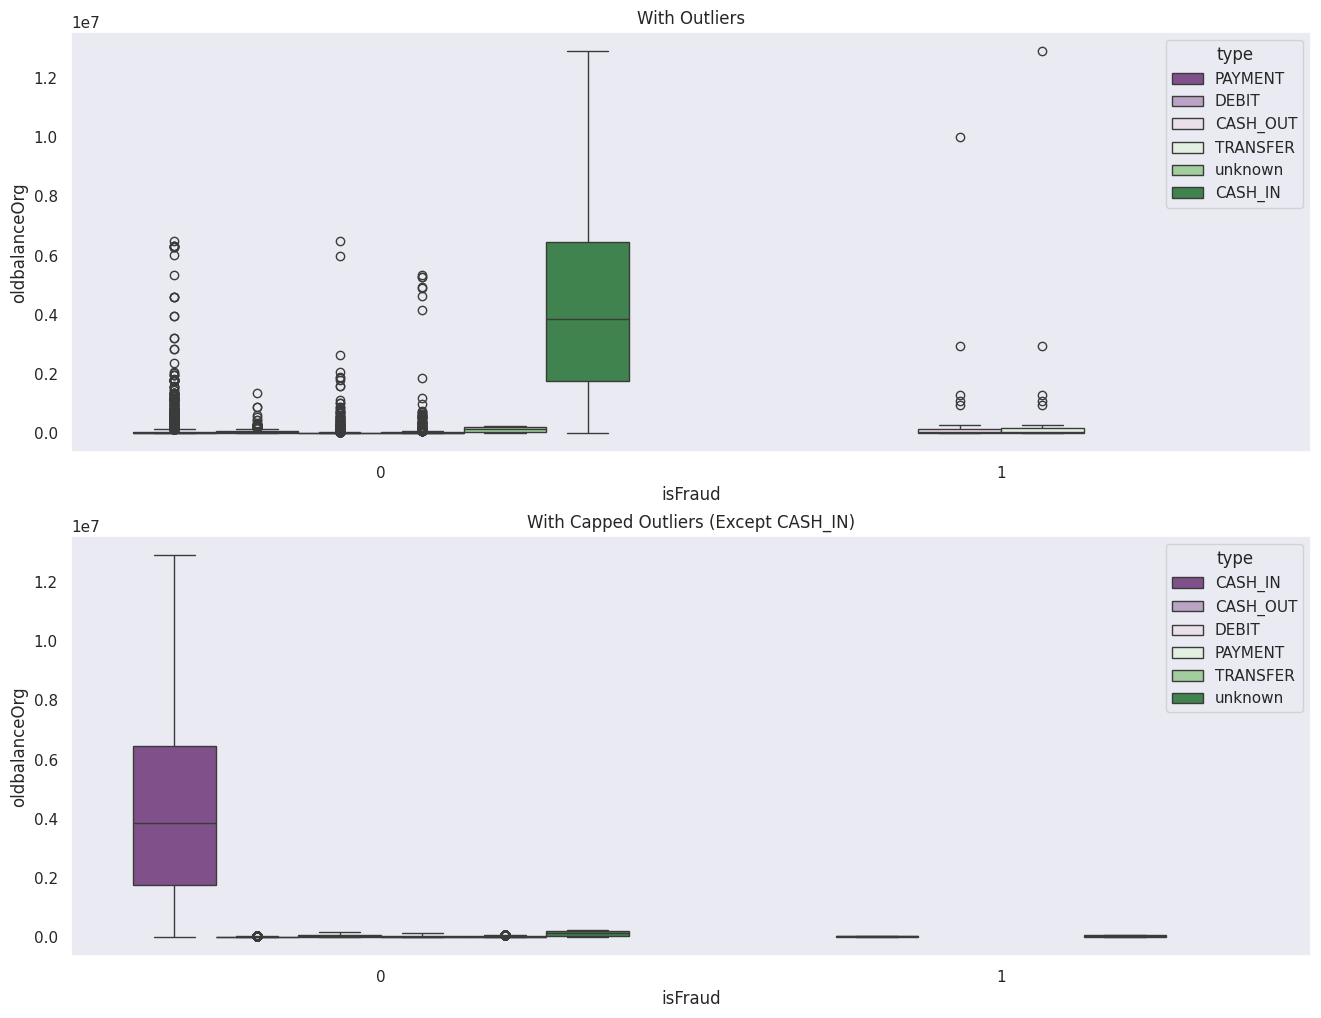

In [ ]:
# Function to cap outliers based on IQR for each group except 'CASH_IN'
def cap_outliers_grouped(df, group_col, target_col, factor=1.5):
    def cap_outliers(df_group):
        Q1 = df_group[target_col].quantile(0.25)
        Q3 = df_group[target_col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        df_group[target_col] = np.where(
            df_group[target_col] > upper_bound, upper_bound,
            np.where(
                df_group[target_col] < lower_bound, lower_bound,
                df_group[target_col]
            )
        )
        return df_group

    # Apply the capping function to each group except 'CASH_IN'
    capped_df = df.groupby(group_col).apply(lambda group: cap_outliers(group) if group.name != 'CASH_IN' else group).reset_index(drop=True)
    return capped_df

# Updated_df is the DataFrame and 'oldbalanceOrg' is the column to cap outliers
Dataset_capped = cap_outliers_grouped(Updated_df.copy(), 'type', 'oldbalanceOrg')

# Plotting
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 12))

# Original data
sns.boxplot(ax=ax1, x="isFraud", y="oldbalanceOrg", hue="type", data=Updated_df, palette="PRGn")
ax1.set_title('With Outliers')

# Data with outliers capped
sns.boxplot(ax=ax2, x="isFraud", y="oldbalanceOrg", hue="type", data=Dataset_capped, palette="PRGn")
ax2.set_title('With Capped Outliers (Except CASH_IN)')

plt.show()


# Box Plots of New Balance Original by Transaction Type and Fraud Status

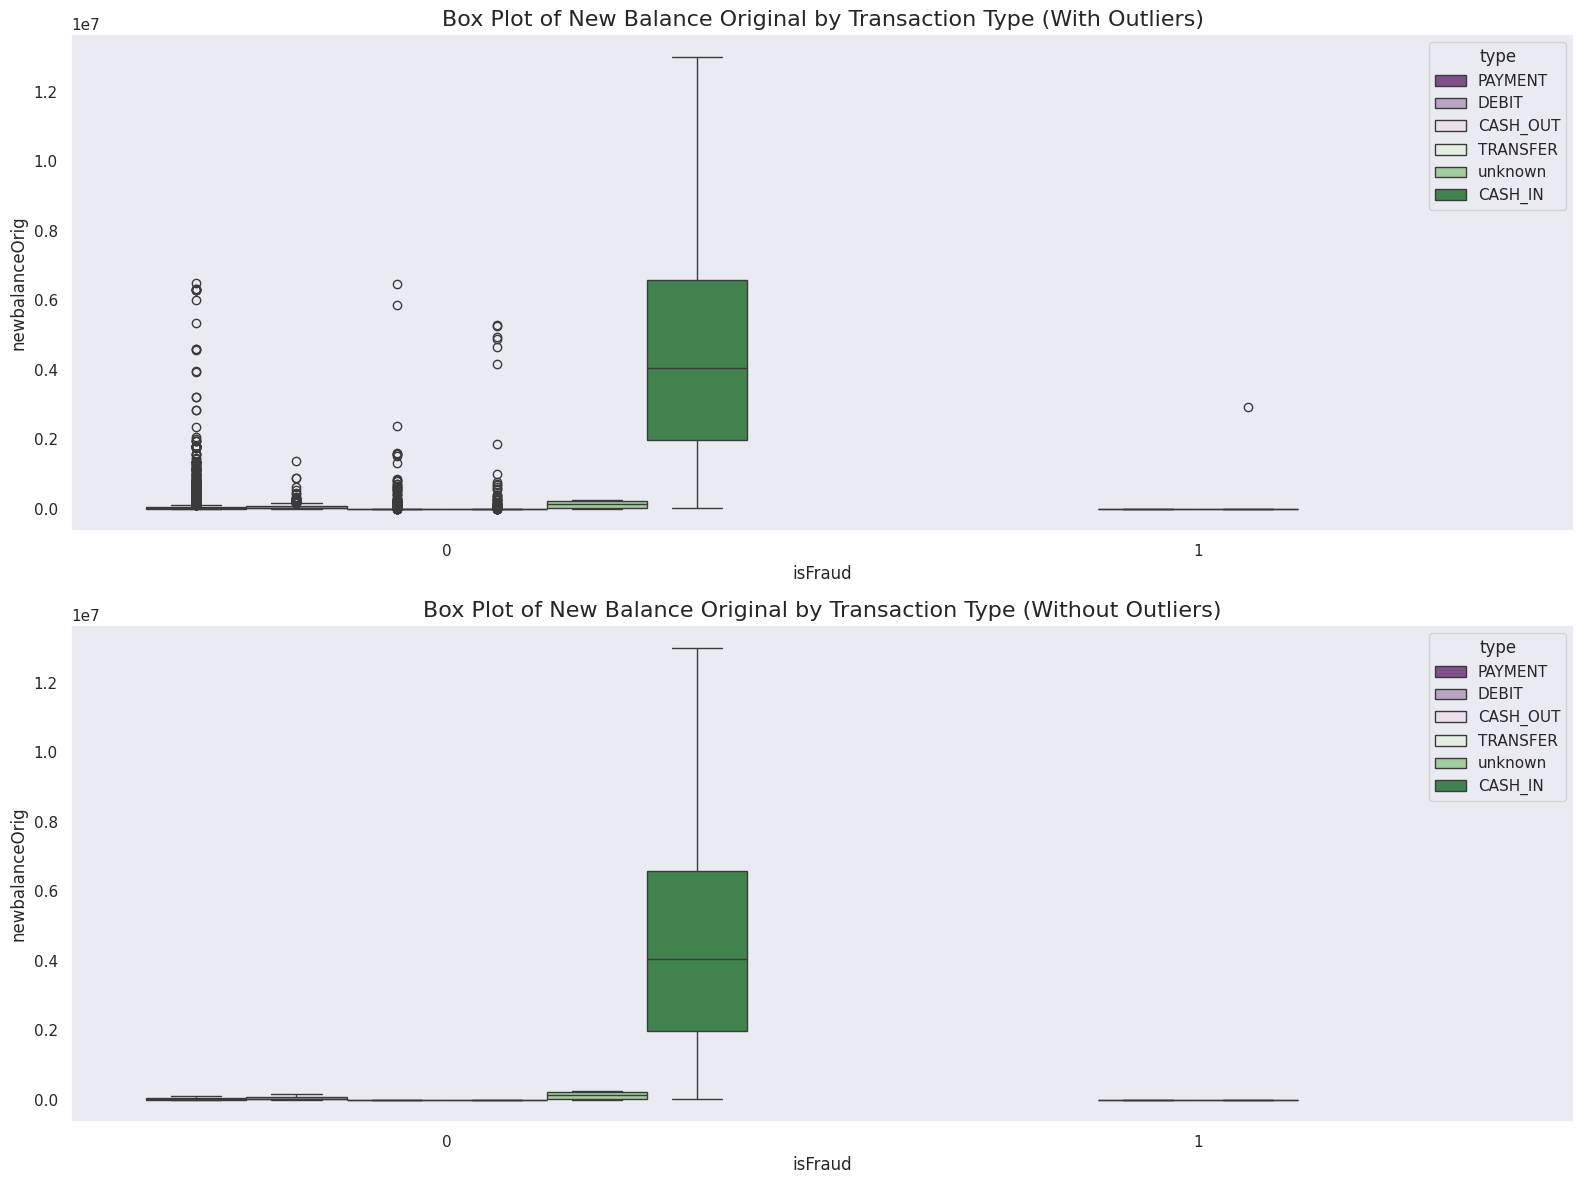

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16,12))

# Box plot with outliers
sns.boxplot(ax=ax1, x="isFraud", y="newbalanceOrig", hue="type", data=Updated_df, palette="PRGn", showfliers=True)
ax1.set_title('Box Plot of New Balance Original by Transaction Type (With Outliers)', fontsize=16)

# Box plot without outliers
sns.boxplot(ax=ax2, x="isFraud", y="newbalanceOrig", hue="type", data=Updated_df, palette="PRGn", showfliers=False)
ax2.set_title('Box Plot of New Balance Original by Transaction Type (Without Outliers)', fontsize=16)

plt.tight_layout()
plt.show()


## Capping Outliers in 'newbalanceOrig' Across Transaction Types

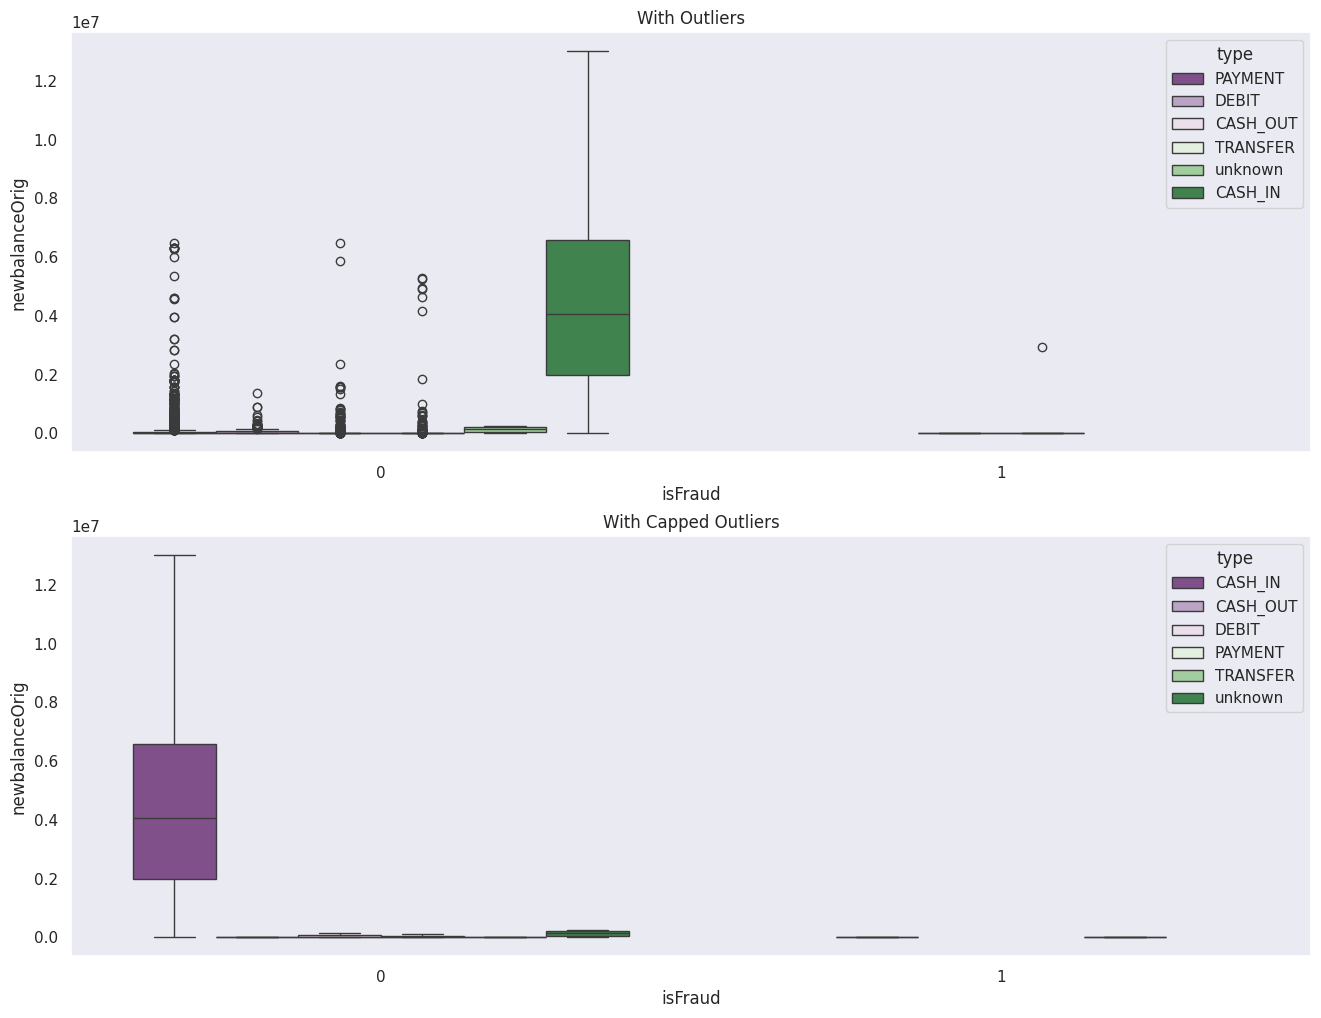

In [ ]:
# Function to cap outliers based on IQR for each group
def cap_outliers_grouped(df, group_col, target_col, factor=1.5):
    def cap_outliers(df_group):
        Q1 = df_group[target_col].quantile(0.25)
        Q3 = df_group[target_col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        df_group[target_col] = np.where(
            df_group[target_col] > upper_bound, upper_bound,
            np.where(
                df_group[target_col] < lower_bound, lower_bound,
                df_group[target_col]
            )
        )
        return df_group

    # Apply the capping function to each group
    return df.groupby(group_col).apply(cap_outliers).reset_index(drop=True)

# Updated_df is the DataFrame and 'newbalanceOrig' is the column to cap outliers
Dataset_capped = cap_outliers_grouped(Updated_df.copy(), 'type', 'newbalanceOrig')

# Plotting
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 12))

# Original data with outliers shown
sns.boxplot(ax=ax1, x="isFraud", y="newbalanceOrig", hue="type", data=Updated_df, palette="PRGn")
ax1.set_title('With Outliers')

# Data with outliers capped
sns.boxplot(ax=ax2, x="isFraud", y="newbalanceOrig", hue="type", data=Dataset_capped, palette="PRGn")
ax2.set_title('With Capped Outliers')

plt.show()


# Box Plots of Old Balance Destination by Transaction Type and Fraud Status

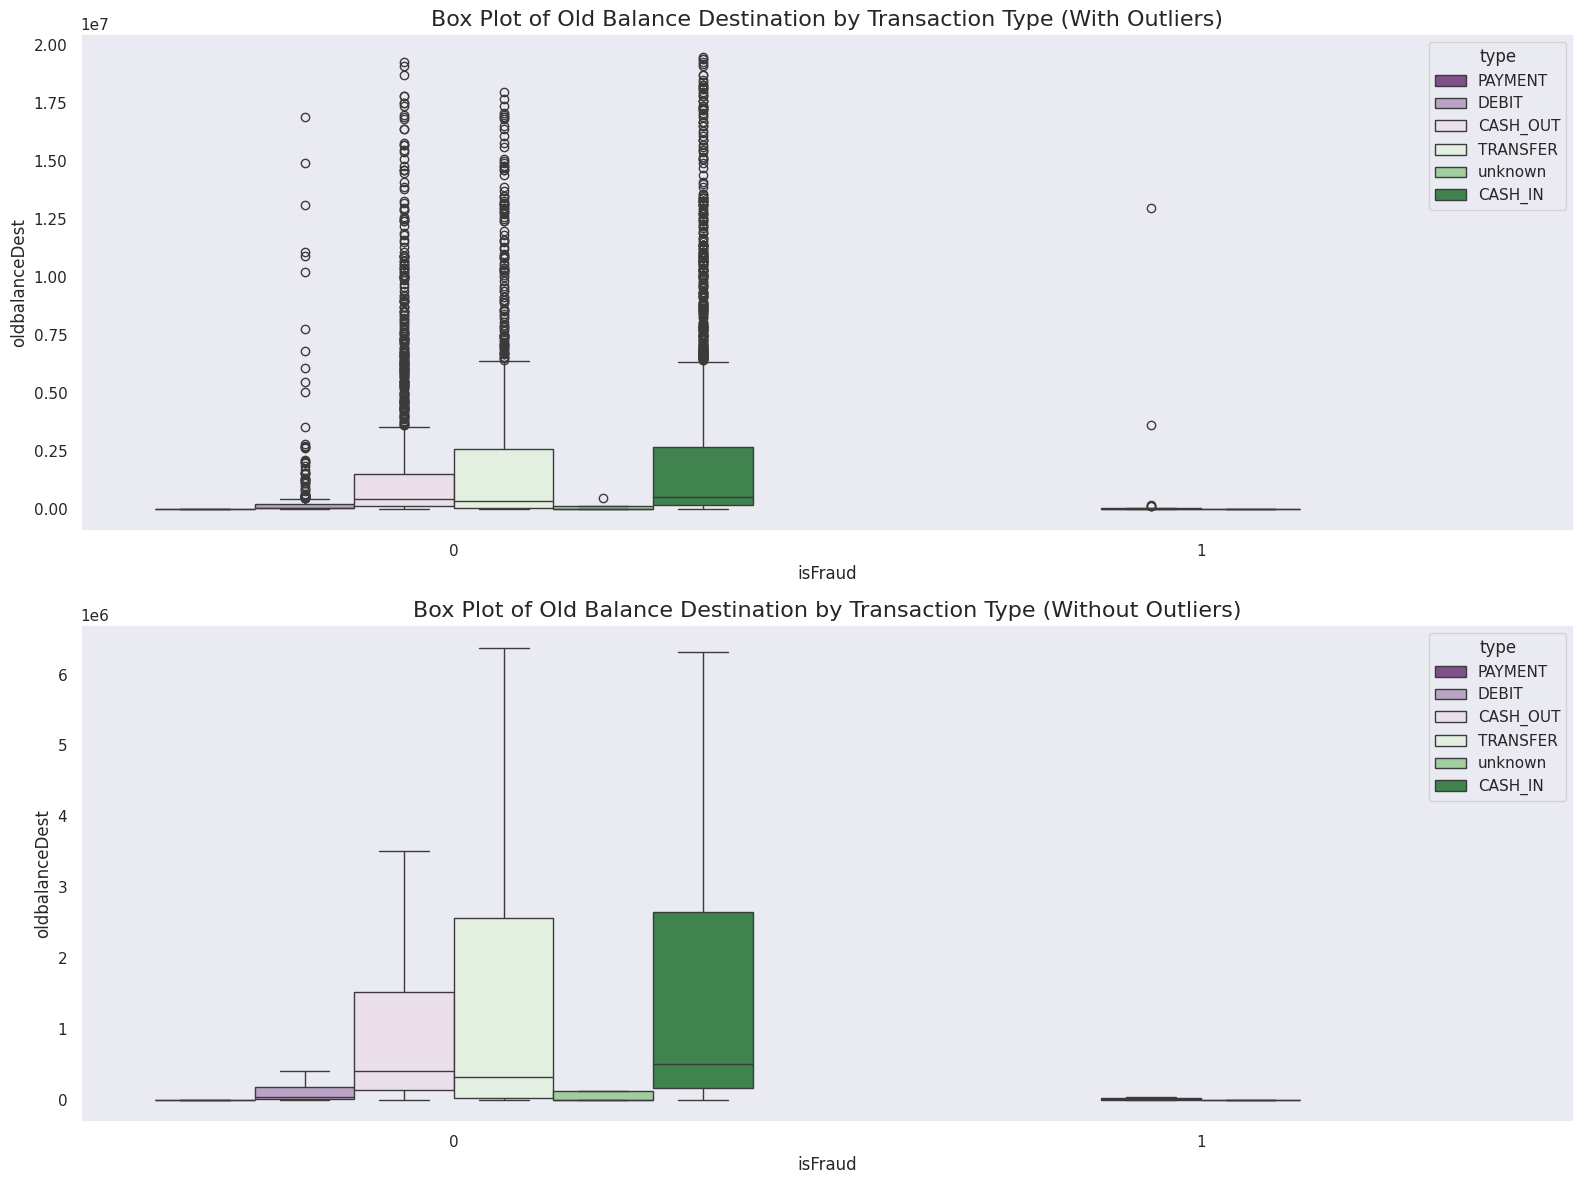

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16,12))

# Box plot with outliers
sns.boxplot(ax=ax1, x="isFraud", y="oldbalanceDest", hue="type", data=Updated_df, palette="PRGn", showfliers=True)
ax1.set_title('Box Plot of Old Balance Destination by Transaction Type (With Outliers)', fontsize=16)

# Box plot without outliers
sns.boxplot(ax=ax2, x="isFraud", y="oldbalanceDest", hue="type", data=Updated_df, palette="PRGn", showfliers=False)
ax2.set_title('Box Plot of Old Balance Destination by Transaction Type (Without Outliers)', fontsize=16)

plt.tight_layout()
plt.show()


## Visualizing and Capping Outliers in 'oldbalanceDest' Across Transaction Types to Enhance Fraud Detection Analysis

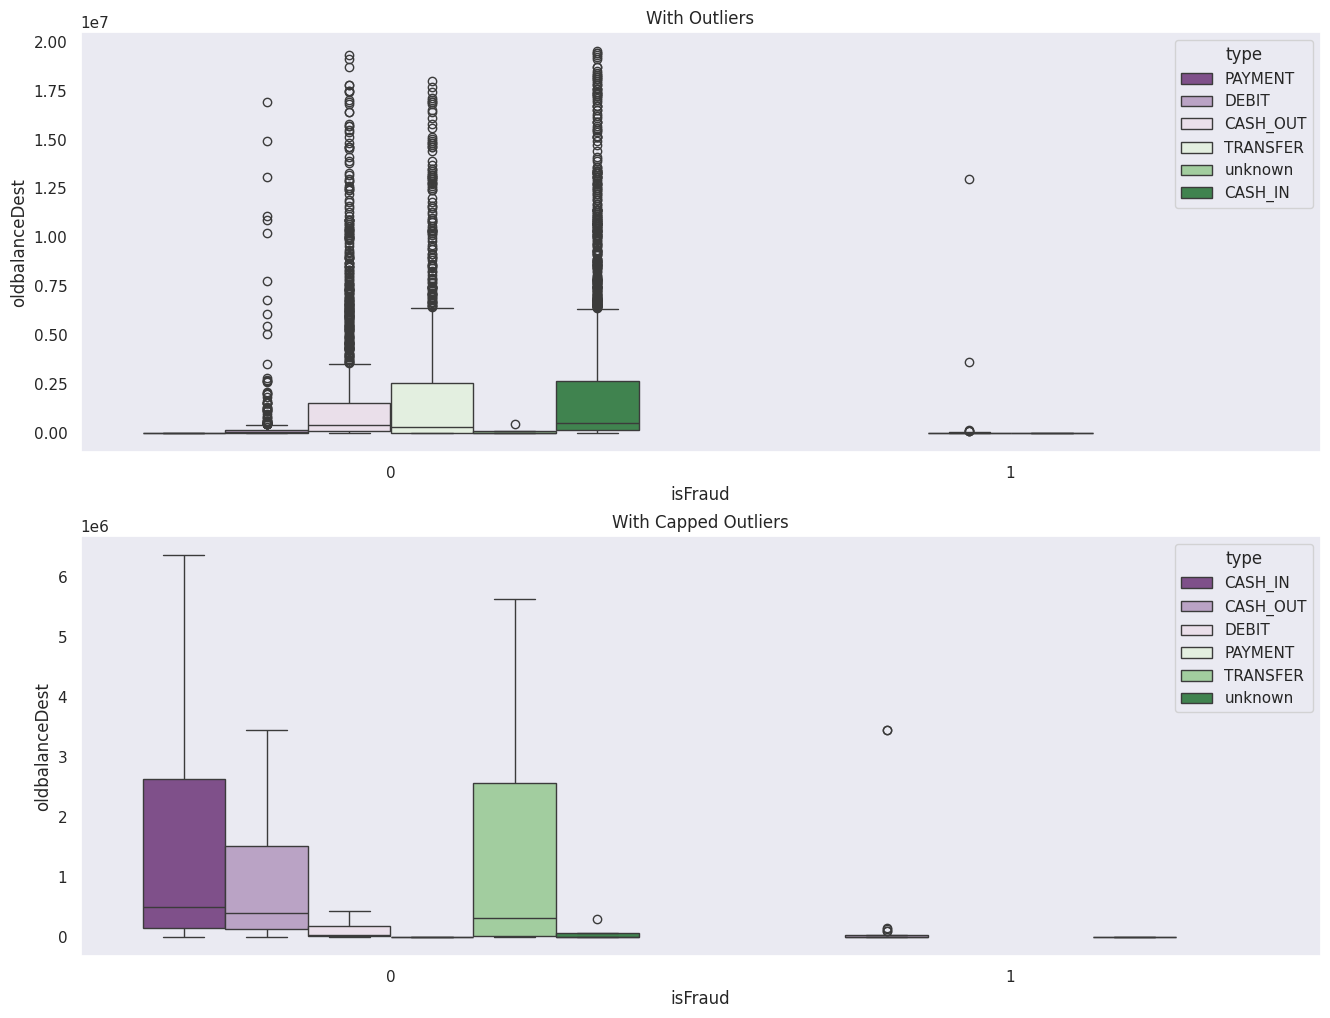

In [ ]:
# Function to cap outliers based on IQR for each group
def cap_outliers_grouped(df, group_col, target_col, factor=1.5):
    def cap_outliers(df_group):
        Q1 = df_group[target_col].quantile(0.25)
        Q3 = df_group[target_col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        df_group[target_col] = np.where(
            df_group[target_col] > upper_bound, upper_bound,
            np.where(
                df_group[target_col] < lower_bound, lower_bound,
                df_group[target_col]
            )
        )
        return df_group

    # Apply the capping function to each group
    return df.groupby(group_col).apply(cap_outliers).reset_index(drop=True)

# Updated_df is the DataFrame and 'oldbalanceDest' is the column to cap outliers
Dataset_capped = cap_outliers_grouped(Updated_df.copy(), 'type', 'oldbalanceDest')

# Plotting
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 12))

# Original data with outliers shown
sns.boxplot(ax=ax1, x="isFraud", y="oldbalanceDest", hue="type", data=Updated_df, palette="PRGn")
ax1.set_title('With Outliers')

# Data with outliers capped
sns.boxplot(ax=ax2, x="isFraud", y="oldbalanceDest", hue="type", data=Dataset_capped, palette="PRGn")
ax2.set_title('With Capped Outliers')

plt.show()


# Box Plots of New Balance Destination by Transaction Type and Fraud Status

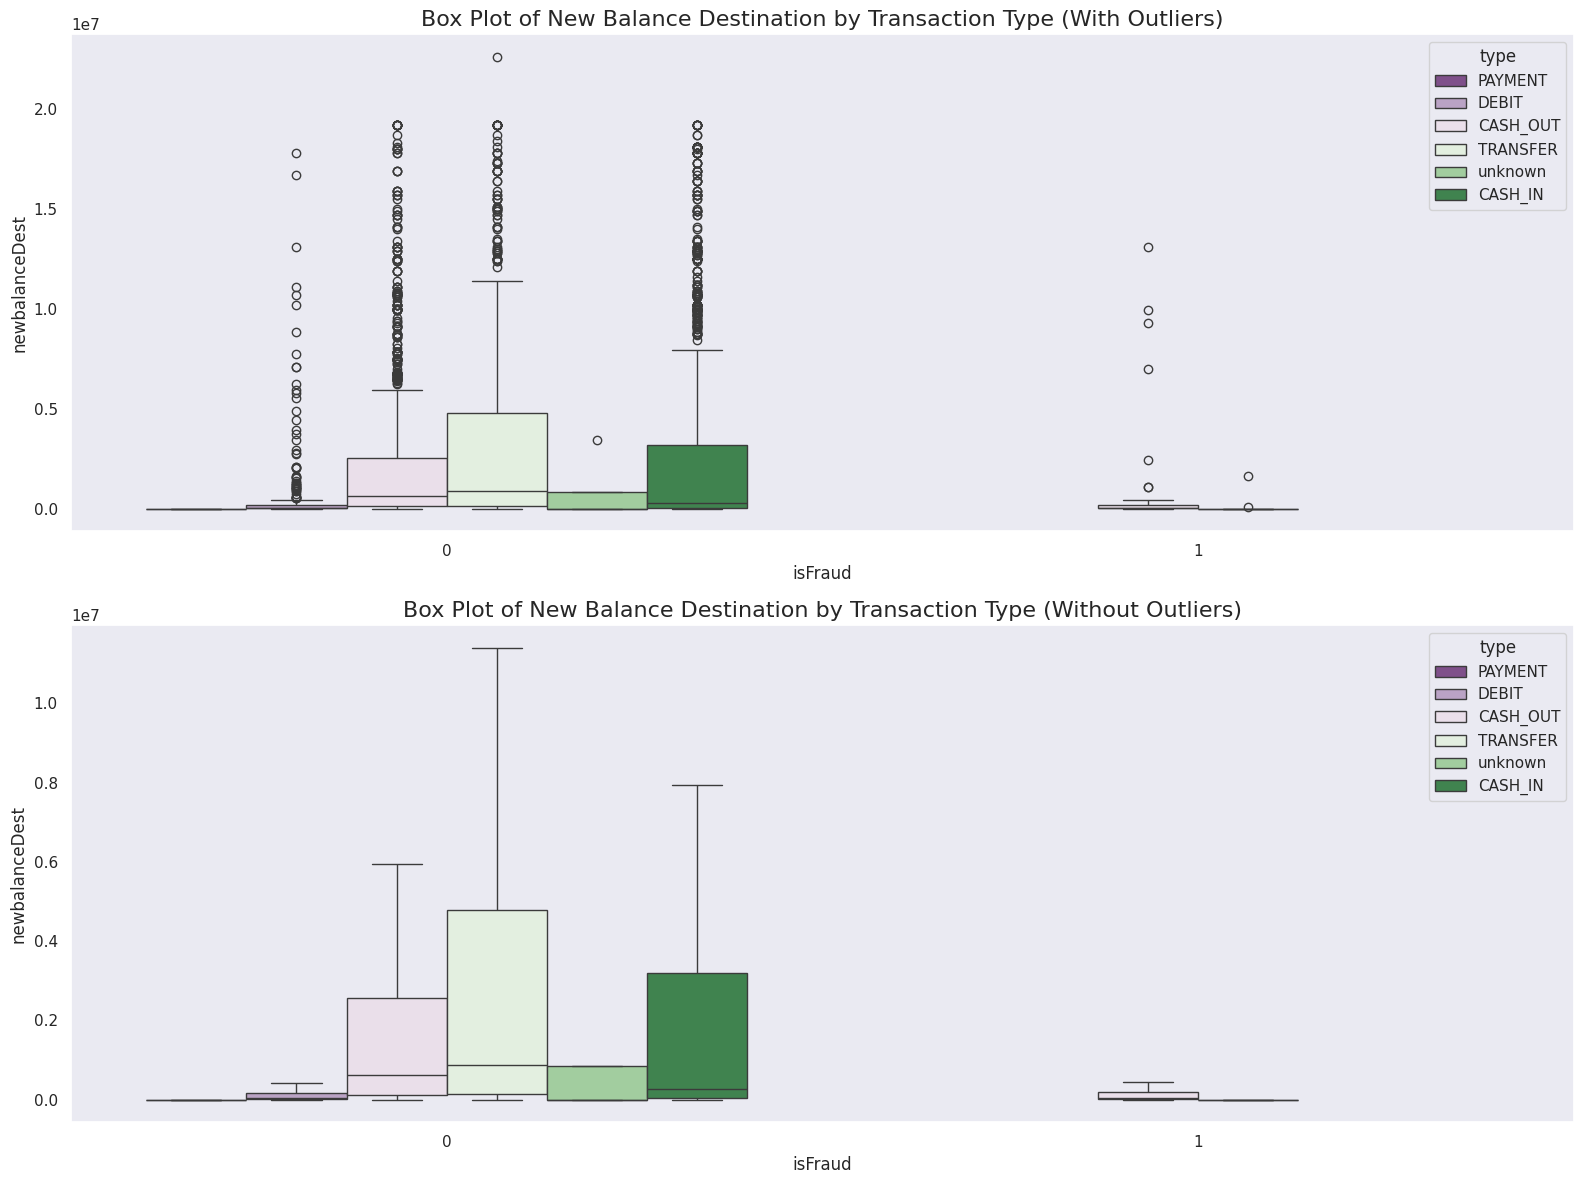

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16,12))

# Box plot with outliers
sns.boxplot(ax=ax1, x="isFraud", y="newbalanceDest", hue="type", data=Updated_df, palette="PRGn", showfliers=True)
ax1.set_title('Box Plot of New Balance Destination by Transaction Type (With Outliers)', fontsize=16)

# Box plot without outliers
sns.boxplot(ax=ax2, x="isFraud", y="newbalanceDest", hue="type", data=Updated_df, palette="PRGn", showfliers=False)
ax2.set_title('Box Plot of New Balance Destination by Transaction Type (Without Outliers)', fontsize=16)

plt.tight_layout()
plt.show()


## Enhancing Transaction Analysis: Capping Outliers in 'newbalanceDest' Across Transaction Types

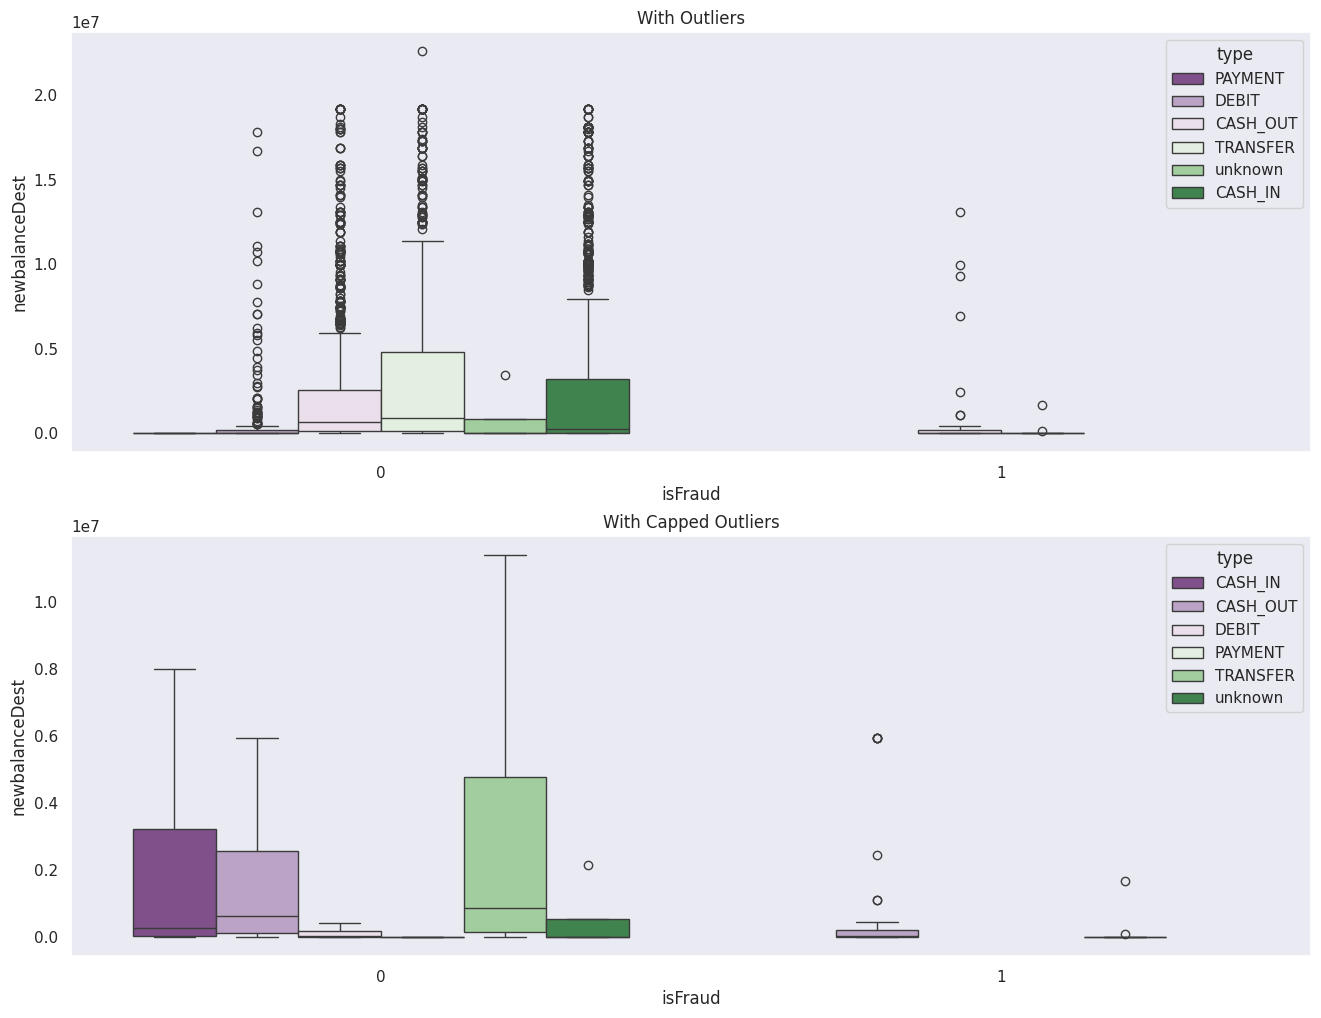

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to cap outliers based on IQR for each group
def cap_outliers_grouped(df, group_col, target_col, factor=1.5):
    def cap_outliers(df_group):
        Q1 = df_group[target_col].quantile(0.25)
        Q3 = df_group[target_col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        df_group[target_col] = np.where(
            df_group[target_col] > upper_bound, upper_bound,
            np.where(
                df_group[target_col] < lower_bound, lower_bound,
                df_group[target_col]
            )
        )
        return df_group

    # Apply the capping function to each group
    return df.groupby(group_col).apply(cap_outliers).reset_index(drop=True)

# Updated_df is the DataFrame and 'newbalanceDest' is the column to cap outliers
Dataset_capped = cap_outliers_grouped(Updated_df.copy(), 'type', 'newbalanceDest')

# Plotting
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 12))

# Original data with outliers shown
sns.boxplot(ax=ax1, x="isFraud", y="newbalanceDest", hue="type", data=Updated_df, palette="PRGn")
ax1.set_title('With Outliers')

# Data with outliers capped
sns.boxplot(ax=ax2, x="isFraud", y="newbalanceDest", hue="type", data=Dataset_capped, palette="PRGn")
ax2.set_title('With Capped Outliers')

plt.show()


## Total Transaction Amount by Type

In [ ]:
Dataset2 = Updated_df.groupby('type')['amount'].sum().reset_index(name='total_amount')
Dataset2

,type,total_amount
0,CASH_IN,3.280082e+08
1,CASH_OUT,2.325186e+08
2,DEBIT,1.242379e+06
3,PAYMENT,4.366704e+07
4,TRANSFER,4.561463e+08
5,unknown,3.752767e+05


## Maximum Values for Numerical Columns

In [ ]:
# Select only the numerical columns
numerical_columns = Updated_df.select_dtypes(include=[float, int])

# Calculate the maximum value for each numerical column
max_values = numerical_columns.max()

# Print the maximum values
print(max_values)


step                     7.0
amount            10000000.0
oldbalanceOrg     12900000.0
newbalanceOrig    13000000.0
oldbalanceDest    19500000.0
newbalanceDest    22600000.0
unusuallogin            20.0
isFraud                  1.0
dtype: float64


## Identification of Fraudulent Transactions Based on Rules

In [ ]:
import numpy as np

# Set of rules to identify known fraud-based
rules_fraud_based_df = Updated_df.copy()
conditions = (
    ((Dataset['oldbalanceOrg'] <= 12900000) &
     (Dataset['type'] == 'TRANSFER') &
     (Dataset['newbalanceDest'] <= 22600000)) |
    ((Dataset['oldbalanceOrg'] > 12900000) &
     (Dataset['newbalanceOrig'] <= 13000000)) |
    ((Dataset['oldbalanceOrg'] > 12900000) &
     (Dataset['newbalanceOrig'] > 13000000) &
     (Dataset['amount'] > 10000000))
)

rules_fraud_based_df['label'] = np.where(conditions, 1, 0)

# Calculate proportions
fraud_cases = rules_fraud_based_df['label'].sum()
total_cases = len(rules_fraud_based_df)
fraud_pct = fraud_cases / total_cases

# Provide a quick statistics
print(f"Based on these rules, we have flagged {fraud_cases} ({fraud_pct:.2%}) fraud cases out of a total of {total_cases} cases.")


Based on these rules, we have flagged 946 (9.34%) fraud cases out of a total of 10125 cases.


In [ ]:
rules_fraud_based_df.head()

,step,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,unusuallogin,Acct type,Date of transaction,Time of day,isFraud,label
0,1,PAYMENT,Indonesia,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,9,Current,3/1/2018,Morning,0,0
1,1,PAYMENT,India,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,10,Savings,5/1/2018,Morning,0,0
2,1,TRANSFER,India,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,2,Current,7/1/2018,Morning,1,1
3,1,CASH_OUT,Australia,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Current,6/1/2018,Afternoon,1,0
4,1,PAYMENT,Australia,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,17,Current,6/1/2018,Morning,0,0


## Bar Plot of Fraud Detection Results


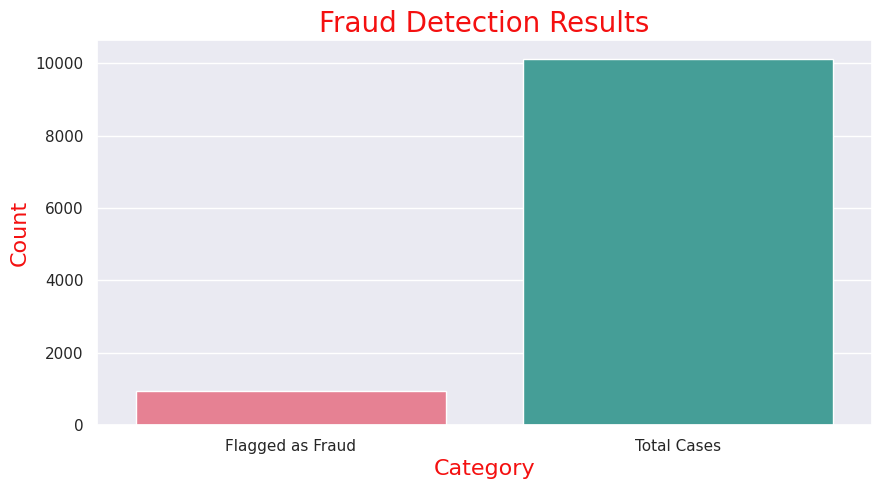

In [ ]:
# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Category': ['Flagged as Fraud', 'Total Cases'],
    'Count': [fraud_cases, total_cases]
})

# Set style and palette
sns.set(style="darkgrid", palette="pastel")

# Plot the data
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Category', y='Count', hue='Category', data=plot_data, palette=sns.color_palette('husl', 2), legend=False)

# Set title and axis labels
ax.set_title("Fraud Detection Results", fontsize=20, color="#F41010")
ax.set_xlabel('Category', fontsize=16, color='#F41010')
ax.set_ylabel('Count', fontsize=16, color='#F41010')

# Show the plot
plt.show()

## Count of transactions for each 'type' in the rules_fraud_based_df DataFrame

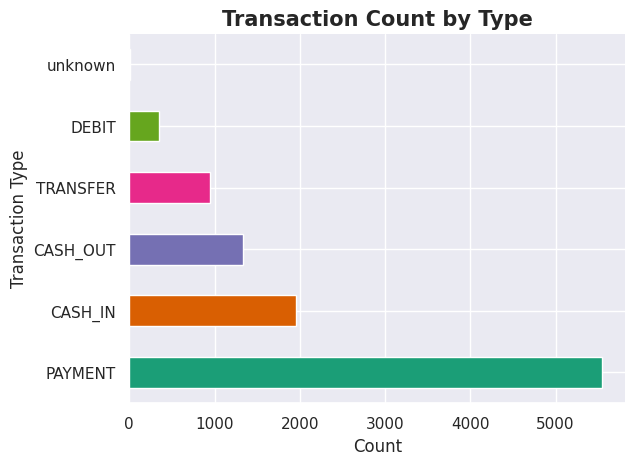

In [ ]:
# Count of transactions for each 'type' in the rules_fraud_based_df DataFrame.

# Count the number of transactions for each type
type_counts = rules_fraud_based_df['type'].value_counts()

# Create a horizontal bar plot with a predefined color palette
type_counts.plot(kind='barh', color=sns.color_palette('Dark2'))

# Hide the top and right borders of the plot for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add a title and labels to the plot
plt.title('Transaction Count by Type', fontsize=15, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Transaction Type', fontsize=12)

# Show the plot
plt.show()

## Summary of Transactions Flagged by Fraud Identification Rules

In [ ]:
Dataset3 = rules_fraud_based_df.groupby('label').agg(
    count=('label', 'size'),
    total_amount=('amount', 'sum')
).reset_index()

In [ ]:
df_based_rules = Dataset3.copy()
df_based_rules.rename(columns={'count':'transactions'}, inplace=True)
df_based_rules['flagged_label'] = np.where(df_based_rules['label']==1, 'fraud', 'normal')
df_based_rules

,label,transactions,total_amount,flagged_label
0,0,9179,6.058115e+08,normal
1,1,946,4.561463e+08,fraud


## Fraud Percentage Analysis in 'Total Transactions' and 'Total Amount of Money'

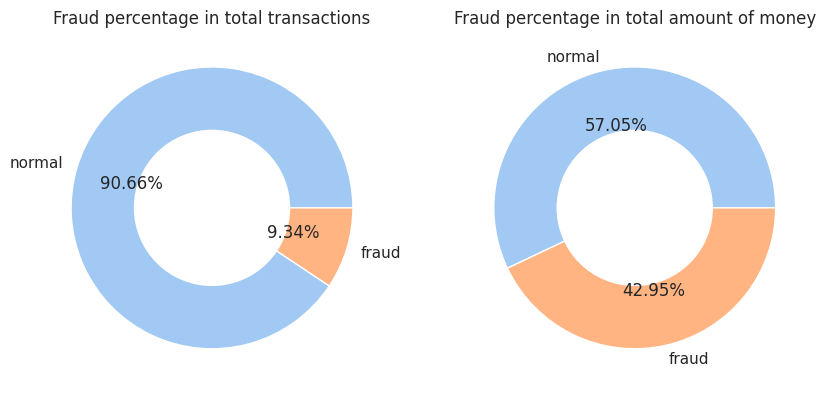

In [ ]:
labels = df_based_rules.flagged_label
volume = df_based_rules.transactions
amount = df_based_rules.total_amount
explode = (0.1, 0.0) #2 volumes to be exploded

# double pie charts
# Make figure and axes
fig, axs = plt.subplots(1,2, figsize=(10, 5))

#first pie
axs[0].pie(volume, labels=labels, autopct='%1.2f%%',\
            wedgeprops= {"edgecolor":"white", 'linewidth': 1, 'antialiased': True})
axs[0].set_title("Fraud percentage in total transactions")

# Adding Circle in first Pie chart
centre_circle = plt.Circle((0, 0), 0.55, fc='white')
axs[0].add_artist(centre_circle)

#second pie
axs[1].pie(amount, labels=labels, autopct='%1.2f%%',\
             wedgeprops= {"edgecolor":"white", 'linewidth': 1, 'antialiased': True})
axs[1].set_title("Fraud percentage in total amount of money")

# Adding Circle in second Pie chart
centre_circle = plt.Circle((0, 0), 0.55, fc='white')
axs[1].add_artist(centre_circle)

plt.show()

## Difference Calculation and Aggregation for Suspicious Transactions

In [ ]:
# Calculate the differences
rules_fraud_based_df['orgDiff'] = rules_fraud_based_df['newbalanceOrig'] - rules_fraud_based_df['oldbalanceOrg']
rules_fraud_based_df['destDiff'] = rules_fraud_based_df['newbalanceDest'] - rules_fraud_based_df['oldbalanceDest']

# Grouping and Aggregating Data
aggregated_df = rules_fraud_based_df.groupby(['nameOrig', 'nameDest', 'label']).agg(
    TotalOrgDiff=('orgDiff', 'sum'),
    TotalDestDiff=('destDiff', 'sum')
).reset_index()

# Filtering Aggregated Data
Dataset4 = aggregated_df[aggregated_df['TotalDestDiff'] >= 1000000].reset_index(drop=True)

In [ ]:
Dataset4.head(10)

,nameOrig,nameDest,label,TotalOrgDiff,TotalDestDiff
0,C1000719581,C1262822392,1,0.00,3400000.00
1,C1003663195,C991505714,0,-2408.00,1095914.71
2,C1004229504,C1609562230,1,-2986.51,6584796.92
3,C1010419513,C11003494,1,0.00,3000000.00
4,C1011044643,C451111351,0,-12154.70,1888797.63
5,C1015278026,C1899073220,0,0.00,1400367.06
6,C1017502292,C1883840933,0,-27626.25,1100000.00
7,C1020775060,C914293025,0,-387388.92,1516155.70
8,C1021071701,C481402298,1,0.00,1197926.96
9,C1024254289,C1303868418,0,-12341.83,2312364.39


## Data Transformation for Suspicious Transaction Details

In [ ]:
# Make a copy of data4 DataFrame
df_top_diff_Org_Dest = Dataset4.copy()

# Create a new column 'flagged_label' to mark rows as 'fraud' or 'normal'
df_top_diff_Org_Dest['flagged_label'] = np.where(df_top_diff_Org_Dest['label'] == 1, 'fraud', 'normal')

# Create a new column 'name' by concatenating 'nameOrig' and 'nameDest'
df_top_diff_Org_Dest['name'] = df_top_diff_Org_Dest['nameOrig'] + df_top_diff_Org_Dest['nameDest']

# Display the first few rows of the modified DataFrame
df_top_diff_Org_Dest.head(10)


,nameOrig,nameDest,label,TotalOrgDiff,TotalDestDiff,flagged_label,name
0,C1000719581,C1262822392,1,0.00,3400000.00,fraud,C1000719581C1262822392
1,C1003663195,C991505714,0,-2408.00,1095914.71,normal,C1003663195C991505714
2,C1004229504,C1609562230,1,-2986.51,6584796.92,fraud,C1004229504C1609562230
3,C1010419513,C11003494,1,0.00,3000000.00,fraud,C1010419513C11003494
4,C1011044643,C451111351,0,-12154.70,1888797.63,normal,C1011044643C451111351
5,C1015278026,C1899073220,0,0.00,1400367.06,normal,C1015278026C1899073220
6,C1017502292,C1883840933,0,-27626.25,1100000.00,normal,C1017502292C1883840933
7,C1020775060,C914293025,0,-387388.92,1516155.70,normal,C1020775060C914293025
8,C1021071701,C481402298,1,0.00,1197926.96,fraud,C1021071701C481402298
9,C1024254289,C1303868418,0,-12341.83,2312364.39,normal,C1024254289C1303868418


## Convert Large Numbers of 'TotalDestDiff' column to Millions in DataFrame for Better Understanding

In [ ]:
def number_format_M(number):
    #function format number to Million
    units = 'B'
    k = 1000000.0
    return '%.3f' % (number / k)

In [ ]:
#format to Million column TotalOrgDiff, TotalDestDiff
df_top_diff_Org_Dest['TotalOrgDiff'] = \
            df_top_diff_Org_Dest['TotalOrgDiff'].apply(lambda x: number_format_M(x))
df_top_diff_Org_Dest['TotalDestDiff'] = \
            df_top_diff_Org_Dest['TotalDestDiff'].apply(lambda x: number_format_M(x))

df_top_diff_Org_Dest.head(10)

,nameOrig,nameDest,label,TotalOrgDiff,TotalDestDiff,flagged_label,name
0,C1000719581,C1262822392,1,0.000,3.400,fraud,C1000719581C1262822392
1,C1003663195,C991505714,0,-0.002,1.096,normal,C1003663195C991505714
2,C1004229504,C1609562230,1,-0.003,6.585,fraud,C1004229504C1609562230
3,C1010419513,C11003494,1,0.000,3.000,fraud,C1010419513C11003494
4,C1011044643,C451111351,0,-0.012,1.889,normal,C1011044643C451111351
5,C1015278026,C1899073220,0,0.000,1.400,normal,C1015278026C1899073220
6,C1017502292,C1883840933,0,-0.028,1.100,normal,C1017502292C1883840933
7,C1020775060,C914293025,0,-0.387,1.516,normal,C1020775060C914293025
8,C1021071701,C481402298,1,0.000,1.198,fraud,C1021071701C481402298
9,C1024254289,C1303868418,0,-0.012,2.312,normal,C1024254289C1303868418


## What type of transactions are associated with fraud?

In [ ]:
Dataset5 = rules_fraud_based_df.groupby(['type', 'label']).size().reset_index(name='transactions')

In [ ]:
df_fraud_in_type_trans = Dataset5.copy()
df_fraud_in_type_trans = Dataset5.copy()
df_fraud_in_type_trans = df_fraud_in_type_trans.rename(columns={'transactions':'sum_trans'})
df_fraud_in_type_trans['label'] = np.where(df_fraud_in_type_trans['label'] == 1, 'fraud', 'regular')
df_fraud_in_type_trans

,type,label,sum_trans
0,CASH_IN,regular,1953
1,CASH_OUT,regular,1336
2,DEBIT,regular,346
3,PAYMENT,regular,5540
4,TRANSFER,fraud,946
5,unknown,regular,4


In [ ]:
outer = df_fraud_in_type_trans.groupby('type').sum(numeric_only=True)
display(outer)
inner = df_fraud_in_type_trans.groupby(['type', 'label']).sum()
display(inner)
inner_labels = inner.index.get_level_values(1)
display(inner_labels)

,sum_trans
type,
CASH_IN,1953
CASH_OUT,1336
DEBIT,346
PAYMENT,5540
TRANSFER,946
unknown,4


,,sum_trans
type,label,
CASH_IN,regular,1953
CASH_OUT,regular,1336
DEBIT,regular,346
PAYMENT,regular,5540
TRANSFER,fraud,946
unknown,regular,4


Index(['regular', 'regular', 'regular', 'regular', 'fraud', 'regular'], dtype='object', name='label')

## Double Pie Chart Showing Fraud and Non-Fraud Transactions by Transaction Type

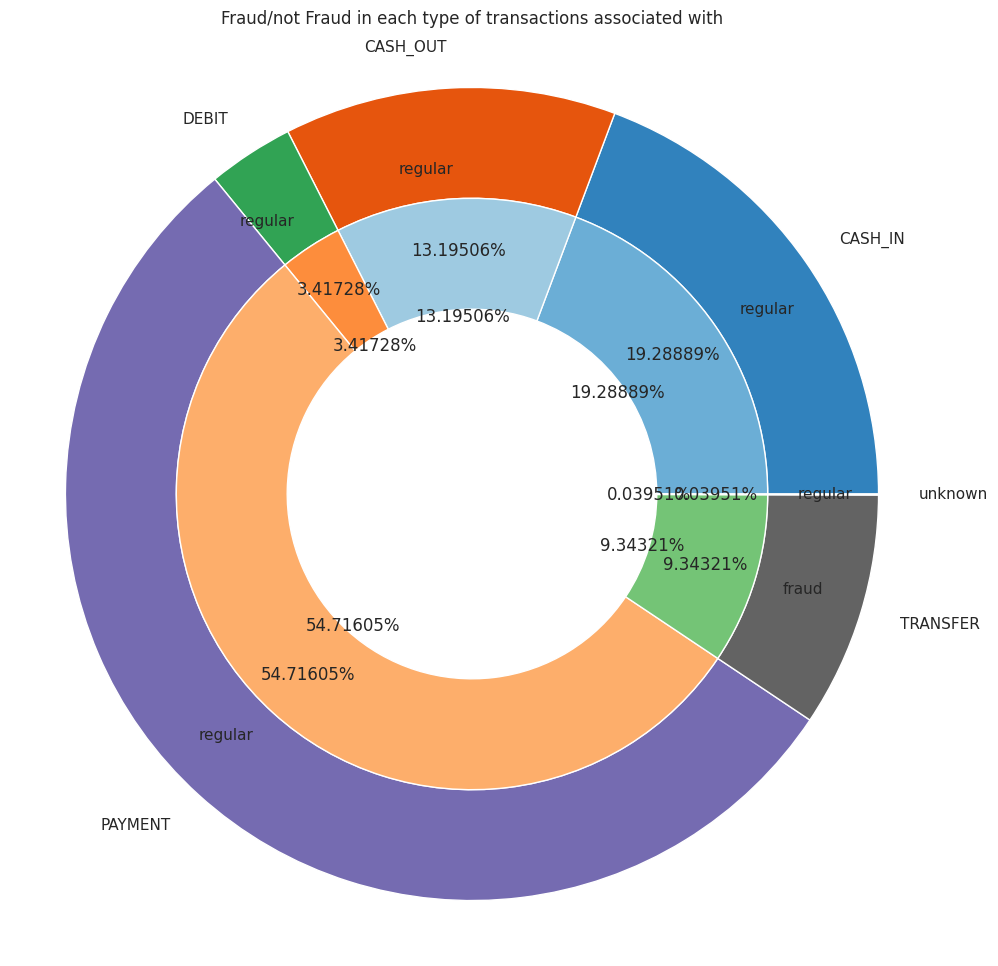

In [ ]:
fig, ax = plt.subplots(figsize=(24,12))
size = 0.3
#cmap color
cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(5)*4)
inner_colors = cmap([1,2, 5,6, 9,10, 13,14, 17,18])
#outter pie
ax.pie(outer.values.flatten(),
       radius=1.1, labels=outer.index, autopct='%1.5f%%', colors=outer_colors,
      wedgeprops=dict(width=size, edgecolor='w'))
#inner pie
ax.pie(inner.values.flatten(), radius=1.1-size, labels=inner_labels, colors=inner_colors,
       autopct='%1.5f%%', wedgeprops=dict(width=size, edgecolor='w'))
#tittle
ax.set(title="Fraud/not Fraud in each type of transactions associated with")

plt.show()

# **Feature Engineering**

In [ ]:
Dataset6 = Updated_df.copy()

### 1) Calculate the differences between old and new balances for both origin and destination accounts.

In [ ]:
Dataset6['Org Balance Difference'] = Dataset6['newbalanceOrig'] - Dataset6['oldbalanceOrg']
Dataset6['Dest Balance Difference'] = Dataset6['newbalanceDest'] - Dataset6['oldbalanceDest']

Dataset6

,step,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,unusuallogin,Acct type,Date of transaction,Time of day,isFraud,Org Balance Difference,Dest Balance Difference
0,1,PAYMENT,Indonesia,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,9,Current,3/1/2018,Morning,0,-9839.64,0.0
1,1,PAYMENT,India,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,10,Savings,5/1/2018,Morning,0,-1864.28,0.0
2,1,TRANSFER,India,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,2,Current,7/1/2018,Morning,1,-181.00,0.0
3,1,CASH_OUT,Australia,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Current,6/1/2018,Afternoon,1,-181.00,-21182.0
4,1,PAYMENT,Australia,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,17,Current,6/1/2018,Morning,0,-11668.14,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,7,PAYMENT,Cuba,337.50,C1494306005,33107.0,32769.50,M1424027000,0.0,0.0,7,Current,3/1/2018,Afternoon,0,-337.50,0.0
10123,7,PAYMENT,Mexico,5003.57,C1633890169,32769.5,27765.93,M1854745805,0.0,0.0,11,Savings,5/1/2018,Morning,0,-5003.57,0.0
10124,7,PAYMENT,Panama,10424.89,C1026138669,50780.0,40355.11,M1852900317,0.0,0.0,6,Savings,7/1/2018,Night,0,-10424.89,0.0
10125,7,PAYMENT,Mexico,2823.59,C378659213,986.0,0.00,M301812950,0.0,0.0,12,Savings,6/1/2018,Night,0,-986.00,0.0


## 2) Create categories based on transaction amounts such as low, medium, and high.

### This code will categorize the values in the 'amount' column of DataFrame 'Dataset6' into four categories ('low', 'medium', 'high', 'very_high') based on the specified bins and labels

In [ ]:
bins = [-np.inf, 1000, 10000, 10000000, np.inf]
labels = ['low', 'medium', 'high', 'very_high']

# Using .loc to modify the original DataFrame
Dataset6.loc[:, 'amount_category'] = pd.cut(Dataset6['amount'], bins=bins, labels=labels)

# Reordering columns
Dataset6 = Dataset6[['step', 'type', 'branch', 'amount', 'amount_category', 'nameOrig',
                     'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest',
                     'newbalanceDest', 'unusuallogin', 'Acct type', 'Date of transaction',
                     'Time of day', 'isFraud']]

# Displaying DataFrame
Dataset6


,step,type,branch,amount,amount_category,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,unusuallogin,Acct type,Date of transaction,Time of day,isFraud
0,1,PAYMENT,Indonesia,9839.64,medium,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,9,Current,3/1/2018,Morning,0
1,1,PAYMENT,India,1864.28,medium,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,10,Savings,5/1/2018,Morning,0
2,1,TRANSFER,India,181.00,low,C1305486145,181.0,0.00,C553264065,0.0,0.0,2,Current,7/1/2018,Morning,1
3,1,CASH_OUT,Australia,181.00,low,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Current,6/1/2018,Afternoon,1
4,1,PAYMENT,Australia,11668.14,high,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,17,Current,6/1/2018,Morning,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,7,PAYMENT,Cuba,337.50,low,C1494306005,33107.0,32769.50,M1424027000,0.0,0.0,7,Current,3/1/2018,Afternoon,0
10123,7,PAYMENT,Mexico,5003.57,medium,C1633890169,32769.5,27765.93,M1854745805,0.0,0.0,11,Savings,5/1/2018,Morning,0
10124,7,PAYMENT,Panama,10424.89,high,C1026138669,50780.0,40355.11,M1852900317,0.0,0.0,6,Savings,7/1/2018,Night,0
10125,7,PAYMENT,Mexico,2823.59,medium,C378659213,986.0,0.00,M301812950,0.0,0.0,12,Savings,6/1/2018,Night,0


## 3) Calculates the transaction counts for both originators and destinations in the DataFrame "Dataset6" and adds these counts as new columns in the DataFrame.

In [ ]:
originator_counts = Dataset6['nameOrig'].value_counts().reset_index()
originator_counts.columns = ['nameOrig', 'originator_counts']
Dataset6 = pd.merge(Dataset6, originator_counts, on='nameOrig', how='left')

destination_counts = Dataset6['nameDest'].value_counts().reset_index()
destination_counts.columns = ['nameDest', 'destination_counts']
Dataset6 = pd.merge(Dataset6, destination_counts, on='nameDest', how='left')
Dataset6

,step,type,branch,amount,amount_category,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,unusuallogin,Acct type,Date of transaction,Time of day,isFraud,originator_counts,destination_counts
0,1,PAYMENT,Indonesia,9839.64,medium,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,9,Current,3/1/2018,Morning,0,1,1
1,1,PAYMENT,India,1864.28,medium,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,10,Savings,5/1/2018,Morning,0,1,1
2,1,TRANSFER,India,181.00,low,C1305486145,181.0,0.00,C553264065,0.0,0.0,2,Current,7/1/2018,Morning,1,1,3
3,1,CASH_OUT,Australia,181.00,low,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Current,6/1/2018,Afternoon,1,1,1
4,1,PAYMENT,Australia,11668.14,high,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,17,Current,6/1/2018,Morning,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,7,PAYMENT,Cuba,337.50,low,C1494306005,33107.0,32769.50,M1424027000,0.0,0.0,7,Current,3/1/2018,Afternoon,0,1,1
10121,7,PAYMENT,Mexico,5003.57,medium,C1633890169,32769.5,27765.93,M1854745805,0.0,0.0,11,Savings,5/1/2018,Morning,0,1,1
10122,7,PAYMENT,Panama,10424.89,high,C1026138669,50780.0,40355.11,M1852900317,0.0,0.0,6,Savings,7/1/2018,Night,0,1,1
10123,7,PAYMENT,Mexico,2823.59,medium,C378659213,986.0,0.00,M301812950,0.0,0.0,12,Savings,6/1/2018,Night,0,1,1


In [ ]:
Dataset6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10125 entries, 0 to 10124
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   step                 10125 non-null  int64   
 1   type                 10125 non-null  object  
 2   branch               10125 non-null  object  
 3   amount               10125 non-null  float64 
 4   amount_category      10125 non-null  category
 5   nameOrig             10125 non-null  object  
 6   oldbalanceOrg        10125 non-null  float64 
 7   newbalanceOrig       10125 non-null  float64 
 8   nameDest             10125 non-null  object  
 9   oldbalanceDest       10125 non-null  float64 
 10  newbalanceDest       10125 non-null  float64 
 11  unusuallogin         10125 non-null  int64   
 12  Acct type            10125 non-null  object  
 13  Date of transaction  10125 non-null  object  
 14  Time of day          10125 non-null  object  
 15  isFraud            

# **Implemention of Machine Learning algorithm**

**Important Note:** Transactions identified as fraudulent are annulled. Hence, for fraud detection analysis, the following columns should not be utilized: 'nameOrig','oldbalanceOrg','newbalanceOrig','nameDest', 'oldbalanceDest', 'newbalanceDest', 'Date of transaction', 'Time of Day', 'Acct type'

In [ ]:
df = Updated_df.copy()
df.head()

,step,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,unusuallogin,Acct type,Date of transaction,Time of day,isFraud
0,1,PAYMENT,Indonesia,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,9,Current,3/1/2018,Morning,0
1,1,PAYMENT,India,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,10,Savings,5/1/2018,Morning,0
2,1,TRANSFER,India,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,2,Current,7/1/2018,Morning,1
3,1,CASH_OUT,Australia,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Current,6/1/2018,Afternoon,1
4,1,PAYMENT,Australia,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,17,Current,6/1/2018,Morning,0


In [ ]:
# Removing the columns that are not necessary for the data modeling

df.drop(['branch', 'nameOrig','oldbalanceOrg','newbalanceOrig','nameDest', 'oldbalanceDest', 'newbalanceDest', 'Date of transaction', 'Time of day'], axis = 1, inplace = True)

In [ ]:
print(df.columns)

Index(['step', 'type', 'amount', 'unusuallogin', 'Acct type', 'isFraud'], dtype='object')


In [ ]:
# printing the data frame after removing the columns
df.head()

,step,type,amount,unusuallogin,Acct type,isFraud
0,1,PAYMENT,9839.64,9,Current,0
1,1,PAYMENT,1864.28,10,Savings,0
2,1,TRANSFER,181.00,2,Current,1
3,1,CASH_OUT,181.00,1,Current,1
4,1,PAYMENT,11668.14,17,Current,0


In [ ]:
# encoding the 'type' column into numerical data
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [ ]:
# encoding the 'Acct type' column into numerical data
le = LabelEncoder()
df['Acct type'] = le.fit_transform(df['Acct type'])

In [ ]:
# separating feature variables and class variables
X = df.drop('isFraud', axis = 1)
y = df['isFraud']

In [ ]:
# standardizing the data
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
# splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

## Logistic Regression

In [ ]:
# make an object of logistic regression
lr = LogisticRegression()

#fitting the trainig data into lr model
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# testing the model on test data
y_pred = lr.predict(X_test)

# Calculating the Performance Matrix

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

#accuracy of the logistic regression
accuracy_lr = accuracy_score(y_test, y_pred)

# precision of the logistic regression
precision_lr = precision_score(y_test, y_pred)

# recall of the logistic regression
recall_lr = recall_score(y_test, y_pred)

# classification report
classification_lr = classification_report(y_test, y_pred)

# print the performance matrix
print(f"Accuracy of logistic regression {accuracy_lr}")
print(f"Precision of logistic regression {precision_lr}")
print(f"Recall of logistic regression {recall_lr}")
print(f"Classification Report of logistic regression\n {classification_lr}")

Accuracy of logistic regression 0.9927583936800527
Precision of logistic regression 1.0
Recall of logistic regression 0.08333333333333333
Classification Report of logistic regression
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      3014
           1       1.00      0.08      0.15        24

    accuracy                           0.99      3038
   macro avg       1.00      0.54      0.58      3038
weighted avg       0.99      0.99      0.99      3038



# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# make an object of logistic regression
sv = DecisionTreeClassifier(max_depth = 20)

#fitting the trainig data into lr model
sv.fit(X_train, y_train)

# testing the model on test data
y_pred = sv.predict(X_test)

## Calculating the Performance Matrix

In [ ]:
# accuracy of the logistic regression
accuracy_sv = accuracy_score(y_test, y_pred)

# precision of the logistic regression
precision_sv = precision_score(y_test, y_pred)

# recall of the logistic regression
recall_sv = recall_score(y_test, y_pred)

# classification report
classification_sv = classification_report(y_test, y_pred)

# print the performance matrix
print(f"Accuracy of Decision Tree {accuracy_sv}")
print(f"Precision of Decision Tree {precision_sv}")
print(f"Recall of Decision Tree {recall_sv}")
print(f"Classification Report of Decision Tree\n {classification_sv}")

Accuracy of Decision Tree 0.990125082290981
Precision of Decision Tree 0.36363636363636365
Recall of Decision Tree 0.3333333333333333
Classification Report of Decision Tree
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      3014
           1       0.36      0.33      0.35        24

    accuracy                           0.99      3038
   macro avg       0.68      0.66      0.67      3038
weighted avg       0.99      0.99      0.99      3038



## Comparing the model

In [ ]:
performance_df = pd.DataFrame({
    'models' : ['Logistic Regression', 'Decision Tree'],
    'accuracy' : [accuracy_lr, accuracy_sv],
    'precision' : [precision_lr, precision_sv],
    'recall' : [recall_lr, recall_sv]
})
performance_df

,models,accuracy,precision,recall
0,Logistic Regression,0.992758,1.000000,0.083333
1,Decision Tree,0.990125,0.363636,0.333333


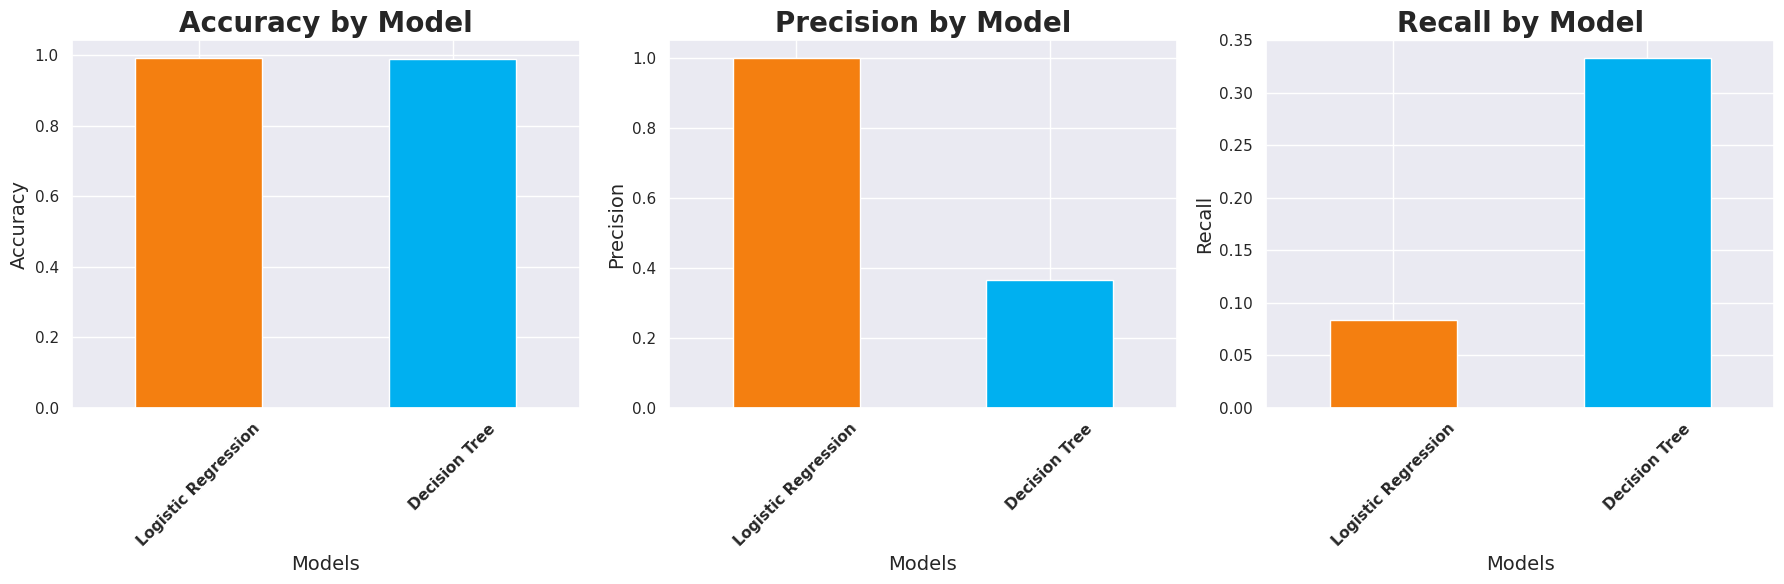

In [ ]:
# Create a figure and multiple axis objects
fig, ax = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Different colors for each metric plot
colors = ['#F47F10', '#00B0F0', '#92D050']

metrics = ['accuracy', 'precision', 'recall']

for i, metric in enumerate(metrics):
    performance_df[metric].plot(kind='bar', ax=ax[i], color = colors)

    # Set the tick labels and rotation
    ax[i].set_xticklabels(performance_df['models'], rotation=45, fontweight = 'bold')

    # Adding labels
    ax[i].set_xlabel('Models', fontsize = 14)
    ax[i].set_ylabel(metric.capitalize(), fontsize = 14)  # Use the metric name as ylabel
    ax[i].set_title(f'{metric.capitalize()} by Model', fontsize = 20, fontweight = 'bold')  # Set dynamic title

plt.tight_layout()
plt.show()

# **Interpretation**:
## Logistic Regression excels in precision but at the expense of recall, which may not be suitable if it's crucial to identify as many positive cases as possible.

## Decision Tree offers a better balance between precision and recall for the minority class, reflected in its higher F1-score for the minority class. It captures more true positives at the cost of a few false positives.

# **Conclusion**:
## Considering the classification report and the balance of precision and recall, the Decision Tree appears to be the better model overall. It provides a more reasonable balance for the minority class (Class 1) and maintains high accuracy.